In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [58]:
import pandas as pd

file_path = r"C:\Users\LENOVO\Downloads\data.xlsx - Sheet1.csv"

# Specify encoding as 'latin-1'
df = pd.read_csv(file_path, encoding='latin-1')



In [59]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df

ID     Salary           DOJ           DOL  \
0     203097   420000.0   6/1/12 0:00       present   
1     579905   500000.0   9/1/13 0:00       present   
2     810601   325000.0   6/1/14 0:00       present   
3     267447  1100000.0   7/1/11 0:00       present   
4     343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...      ...        ...           ...           ...   
3993   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995  355888   320000.0   7/1/13 0:00       present   
3996  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage                         10board  ...  ComputerScience  \
0            84.30  board ofsecondary education,ap  ...               -1   
1            85.40                            cbse  ...               -1   
2            85.00                            cbse  ...               -1   
3            85.60                            cbse  ...               -1   
4            78.00                            cbse  ...               -1   
...            ...                             ...  ...              ...   
3993         52.09                            cbse  ...               -1   
3994         90.00                     state board  ...               -1   
3995         81.86                      bse,odisha  ...               -1   
3996         78.72                     state board  ...              438   
3997         70.60                            cbse  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
0                 -1             -1           -1         -1            0.9737   
1                 -1             -1           -1         -1           -0.7335   
2                 -1             -1           -1         -1            0.2718   
3                 -1             -1           -1         -1            0.0464   
4                 -1             -1           -1         -1           -0.8810   
...              ...            ...          ...        ...               ...   
3993              -1             -1           -1         -1           -0.1082   
3994              -1             -1           -1         -1           -0.3027   
3995              -1             -1           -1         -1           -1.5765   
3996              -1             -1           -1         -1           -0.1590   
3997              -1             -1           -1         -1           -1.1128   

     agreeableness  extraversion  nueroticism  openess_to_experience  
0           0.8128        0.5269      1.35490                -0.4455  
1           0.3789        1.2396     -0.10760                 0.8637  
2           1.7109        0.1637     -0.86820                 0.6721  
3           0.3448       -0.3440     -0.40780                -0.9194  
4          -0.2793       -1.0697      0.09163                -0.1295  
...            ...           ...          ...                    ...  
3993        0.3448        0.2366      0.64980        

In [60]:
df.head()

ID     Salary          DOJ          DOL               Designation  \
0  203097   420000.0  6/1/12 0:00      present   senior quality engineer   
1  579905   500000.0  9/1/13 0:00      present         assistant manager   
2  810601   325000.0  6/1/14 0:00      present          systems engineer   
3  267447  1100000.0  7/1/11 0:00      present  senior software engineer   
4  343523   200000.0  3/1/14 0:00  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   
4    Manesar      m  2/27/91 0:00          78.0   

                          10board  ...  ComputerScience  MechanicalEngg  \
0  board ofsecondary education,ap  ...               -1              -1   
1                            cbse  ...               -1              -1   
2                            cbse  ...               -1              -1   
3                            cbse  ...               -1              -1   
4                            cbse  ...               -1              -1   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
0             -1           -1         -1            0.9737        0.8128   
1             -1           -1         -1           -0.7335        0.3789   
2             -1           -1         -1            0.2718        1.7109   
3             -1           -1         -1            0.0464        0.3448   
4             -1           -1         -1           -0.8810       -0.2793   

   extraversion  nueroticism  openess_to_experience  
0        0.5269      1.35490                -0.4455  
1        1.2396     -0.10760                 0.8637  
2        0.1637     -0.86820                 0.6721  
3       -0.3440     -0.40780                -0.9194  
4       -1.0697      0.09163                -0.1295  

[5 rows x 38 columns]

In [61]:
df.tail()

ID    Salary           DOJ           DOL  \
3993   47916  280000.0  10/1/11 0:00  10/1/12 0:00   
3994  752781  100000.0   7/1/13 0:00   7/1/13 0:00   
3995  355888  320000.0   7/1/13 0:00       present   
3996  947111  200000.0   7/1/14 0:00   1/1/15 0:00   
3997  324966  400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage      10board  ...  ComputerScience  MechanicalEngg  \
3993         52.09         cbse  ...               -1              -1   
3994         90.00  state board  ...               -1              -1   
3995         81.86   bse,odisha  ...               -1              -1   
3996         78.72  state board  ...              438              -1   
3997         70.60         cbse  ...               -1              -1   

     ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
3993             -1           -1         -1           -0.1082        0.3448   
3994             -1           -1         -1           -0.3027        0.8784   
3995             -1           -1         -1           -1.5765       -1.5273   
3996             -1           -1         -1           -0.1590        0.0459   
3997             -1           -1         -1           -1.1128       -0.2793   

      extraversion  nueroticism  openess_to_experience  
3993        0.2366      0.64980                -0.9194  
3994        0.9322      0.77980                -0.0943  
3995       -1.5051     -1.31840                -0.7615  
3996       -0.4511     -0.36120                -0.0943  
3997       -0.6343      1.32553                -0.6035  

[5 rows x 38 columns]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [63]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [64]:
df.duplicated().sum()

0

In [65]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [66]:
df.shape

(3998, 38)

In [67]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [75]:
df.select_dtypes(include=['number']).columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [76]:
df_n=df.select_dtypes(include=['number'])
df_n.head()

ID     Salary  10percentage  12graduation  12percentage  CollegeID  \
0  203097   420000.0          84.3          2007          95.8       1141   
1  579905   500000.0          85.4          2007          85.0       5807   
2  810601   325000.0          85.0          2010          68.2         64   
3  267447  1100000.0          85.6          2007          83.6       6920   
4  343523   200000.0          78.0          2008          76.8      11368   

   CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  ...  \
0            2       78.00           1141                0  ...   
1            2       70.06           5807                0  ...   
2            2       70.00             64                0  ...   
3            1       74.64           6920                1  ...   
4            2       73.90          11368                0  ...   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 27 columns]

In [77]:
df_n.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [78]:
df_o=df.select_dtypes(include=['object'])
df_o.head()

DOJ          DOL               Designation    JobCity Gender  \
0  6/1/12 0:00      present   senior quality engineer  Bangalore      f   
1  9/1/13 0:00      present         assistant manager     Indore      m   
2  6/1/14 0:00      present          systems engineer    Chennai      f   
3  7/1/11 0:00      present  senior software engineer    Gurgaon      m   
4  3/1/14 0:00  3/1/15 0:00                       get    Manesar      m   

            DOB                         10board  \
0  2/19/90 0:00  board ofsecondary education,ap   
1  10/4/89 0:00                            cbse   
2   8/3/92 0:00                            cbse   
3  12/5/89 0:00                            cbse   
4  2/27/91 0:00                            cbse   

                              12board       Degree  \
0  board of intermediate education,ap  B.Tech/B.E.   
1                                cbse  B.Tech/B.E.   
2                                cbse  B.Tech/B.E.   
3                                cbse  B.Tech/B.E.   
4                                cbse  B.Tech/B.E.   

                              Specialization    CollegeState  
0                       computer engineering  Andhra Pradesh  
1  electronics and communication engineering  Madhya Pradesh  
2                     information technology   Uttar Pradesh  
3                       computer engineering           Delhi  
4  electronics and communication engineering   Uttar Pradesh

In [79]:
df_o.describe()

DOJ      DOL        Designation    JobCity Gender  \
count          3998     3998               3998       3998   3998   
unique           81       67                419        339      2   
top     7/1/14 0:00  present  software engineer  Bangalore      m   
freq            199     1875                539        627   3041   

                DOB 10board 12board       Degree  \
count          3998    3998    3998         3998   
unique         1872     275     340            4   
top     1/1/91 0:00    cbse    cbse  B.Tech/B.E.   
freq             11    1395    1400         3700   

                                   Specialization   CollegeState  
count                                        3998           3998  
unique                                         46             26  
top     electronics and communication engineering  Uttar Pradesh  
freq                                          880            915

## Probability Density Function (PDF):

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

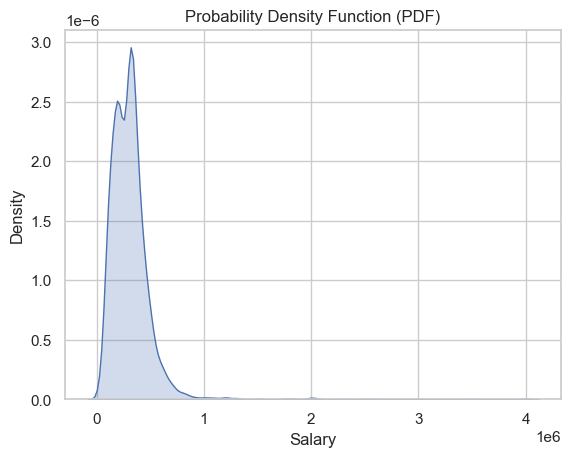

In [69]:


# Set the style
sns.set(style="whitegrid")

# Create a Probability Density Function (PDF) using KDE (Kernel Density Estimation)
sns.kdeplot(df['Salary'], fill=True)
plt.title('Probability Density Function (PDF)')
plt.show()


## Histogram

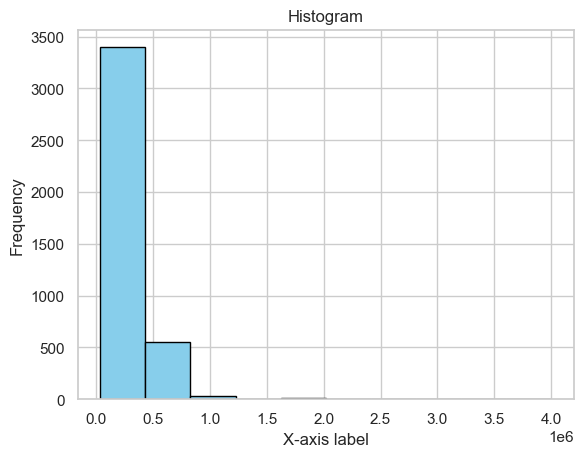

In [70]:
# Create a histogram
plt.hist(df['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('X-axis label')
plt.ylabel('Frequency')
plt.show()


## Boxplot

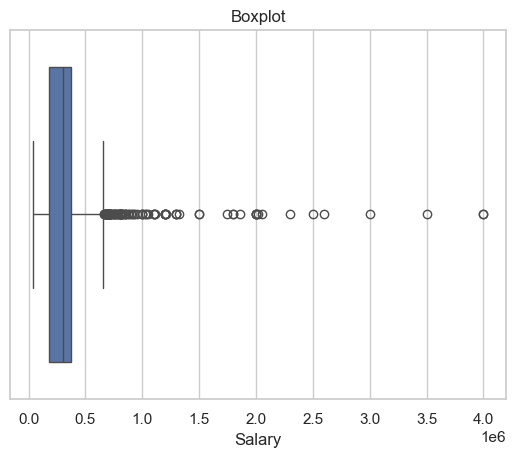

In [71]:
# Create a boxplot
sns.boxplot(x=df['Salary'])
plt.title('Boxplot')
plt.show()


## Countplot (for categorical variables):

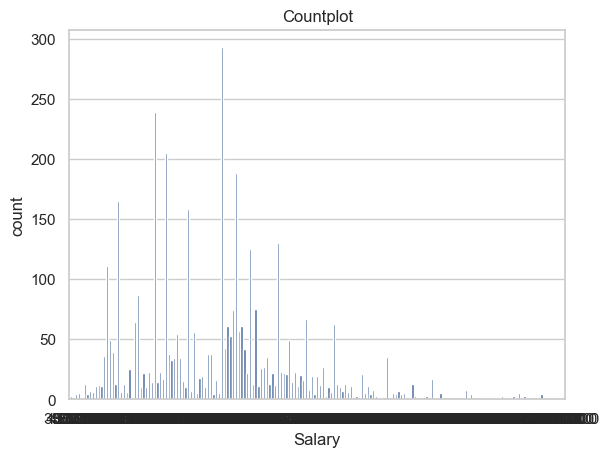

In [72]:
# Create a countplot for a categorical variable
sns.countplot(x='Salary', data=df)
plt.title('Countplot')
plt.show()


## Univariate analysis

### ### Find the outliers in each numerical column

In [81]:
def find_outliers(data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

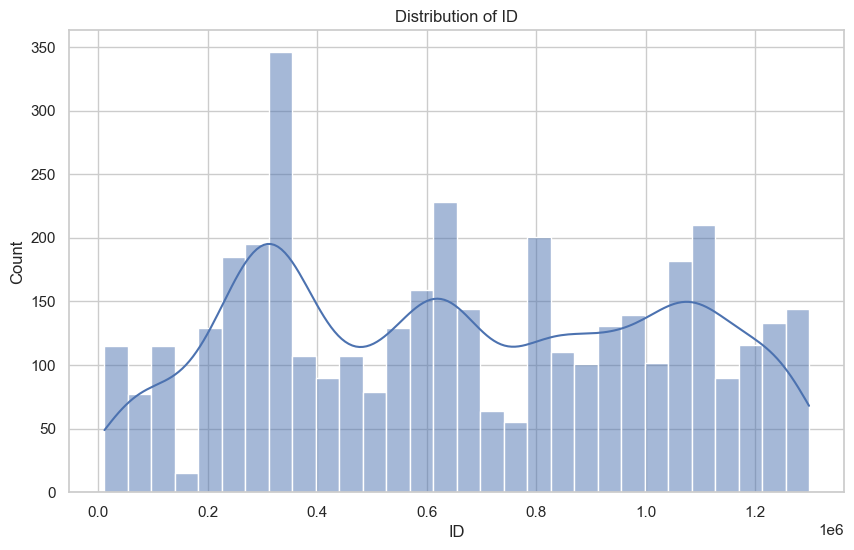

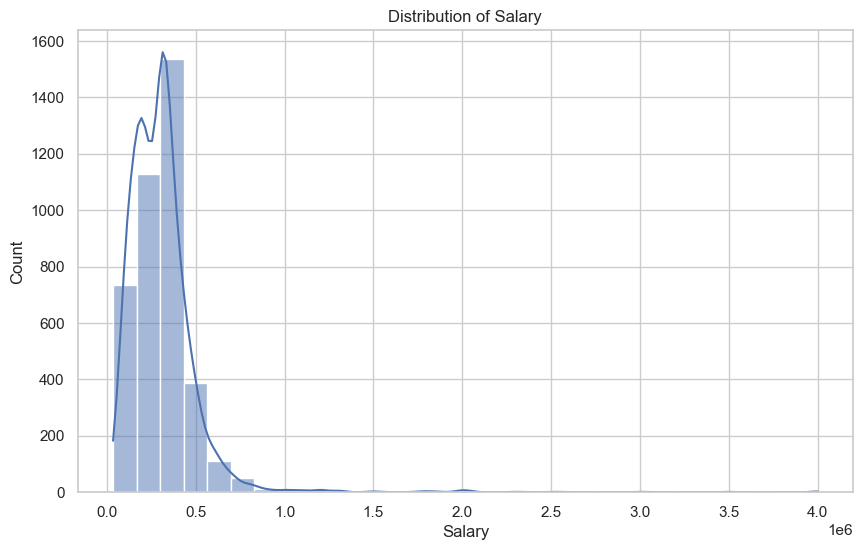

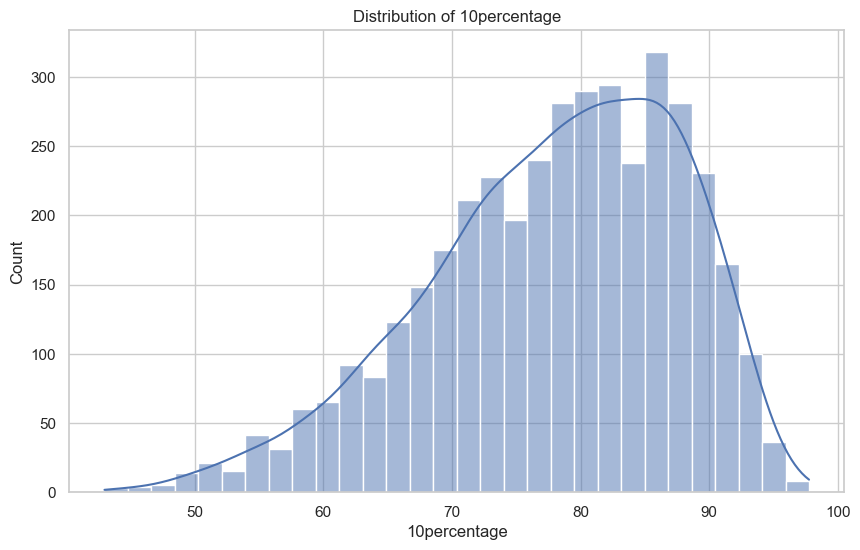

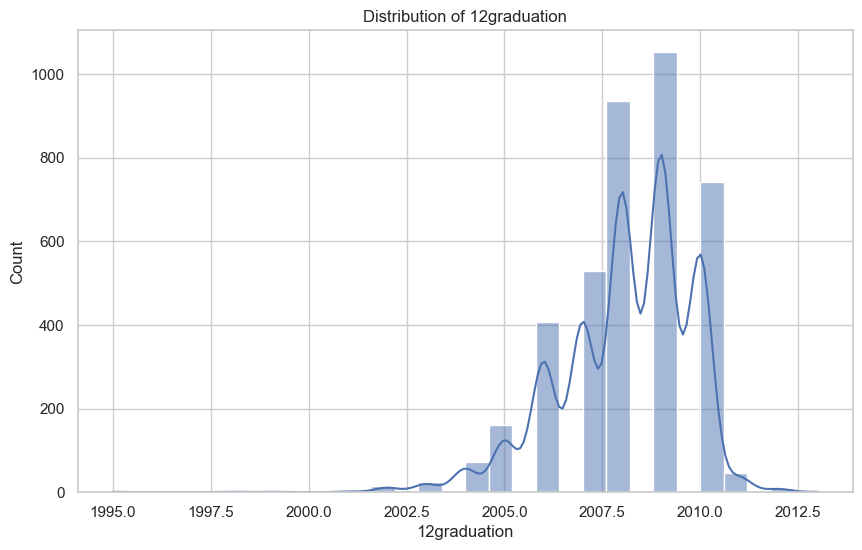

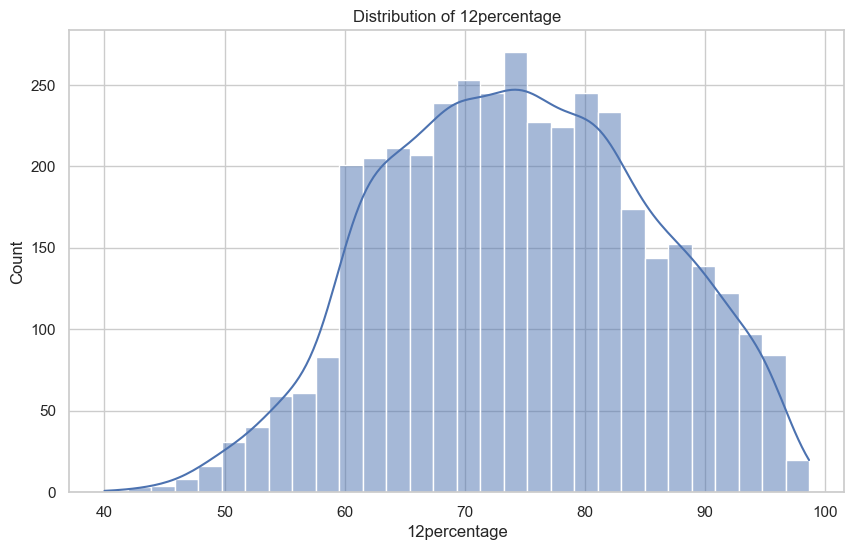

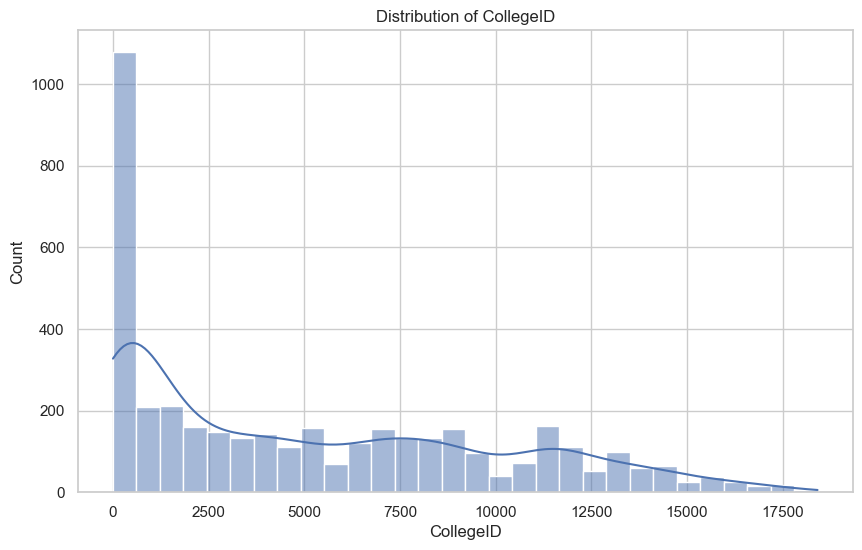

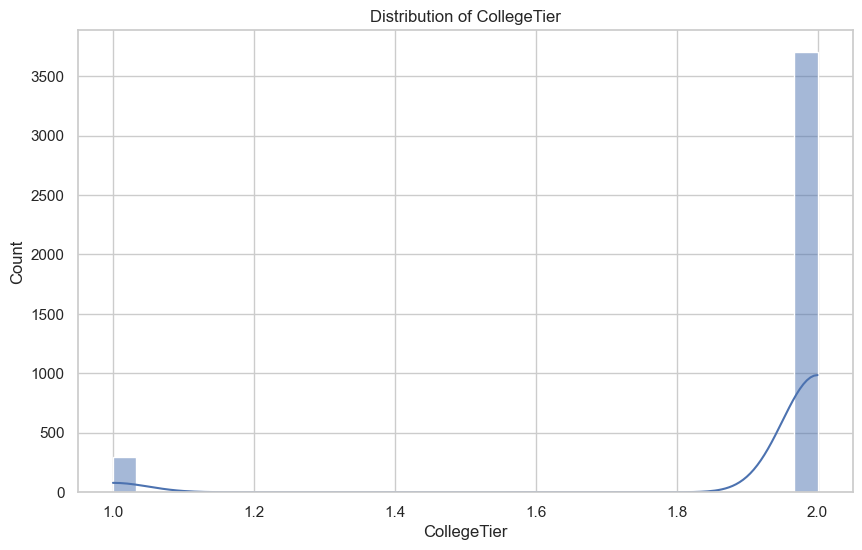

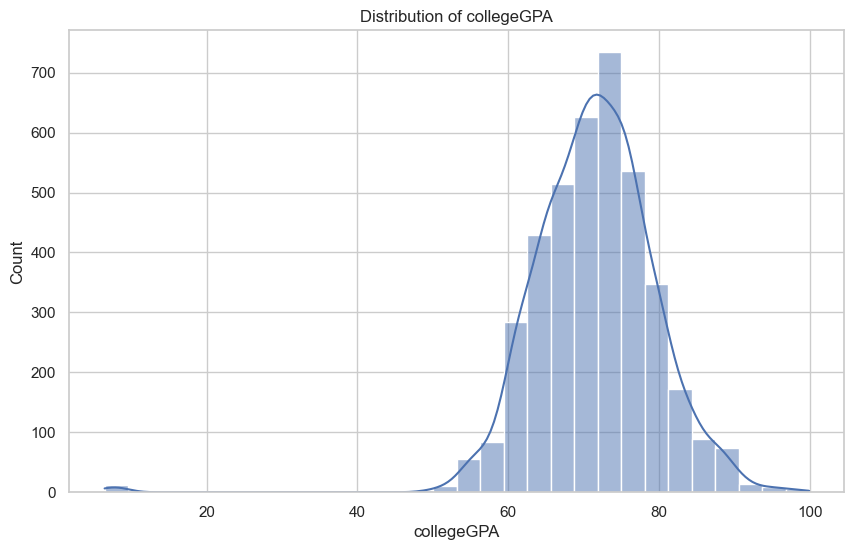

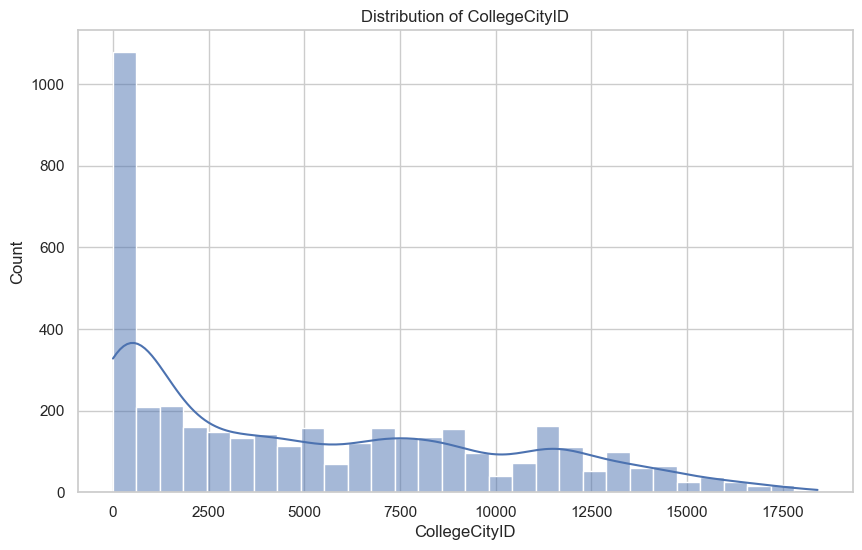

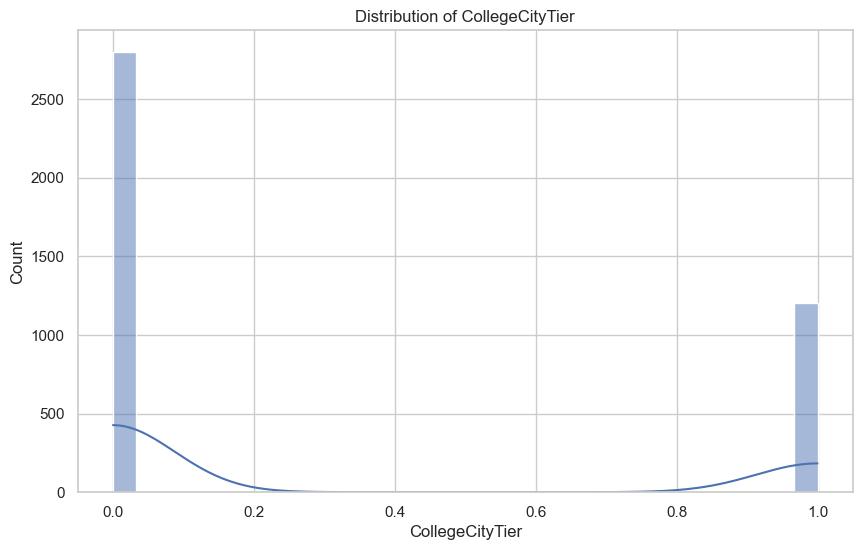

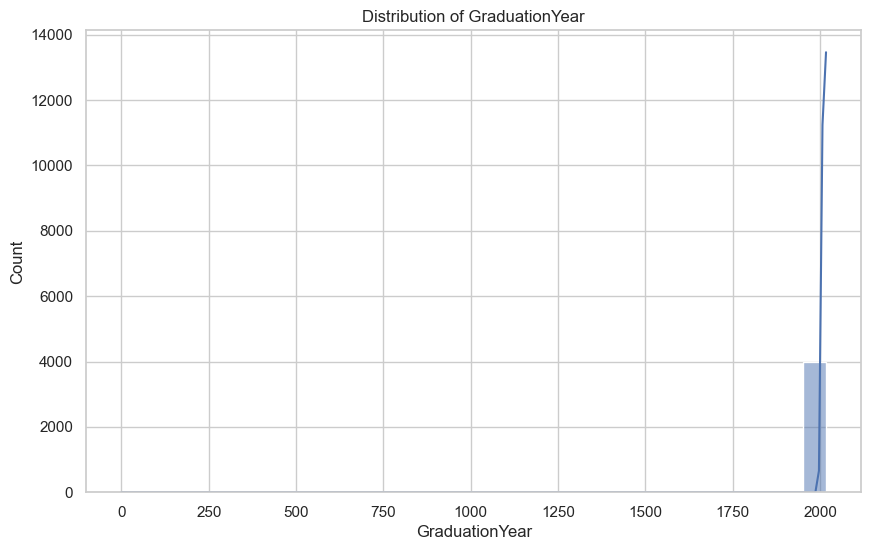

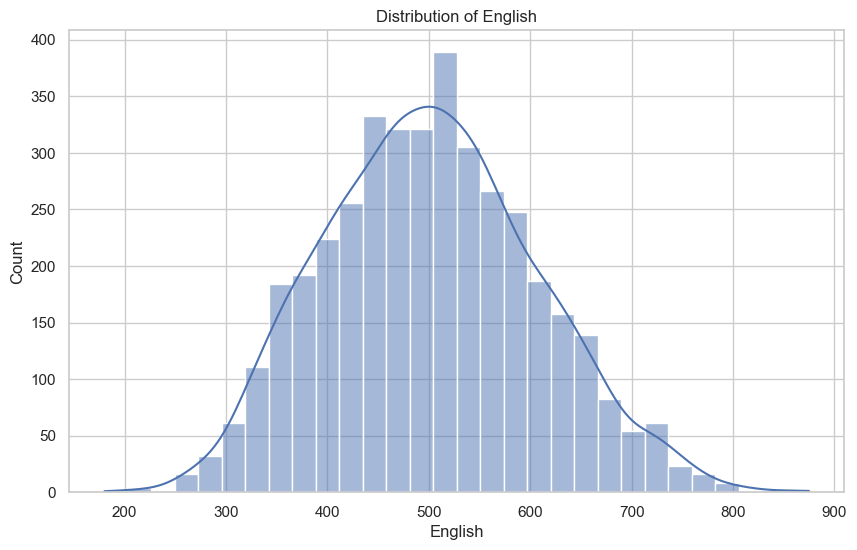

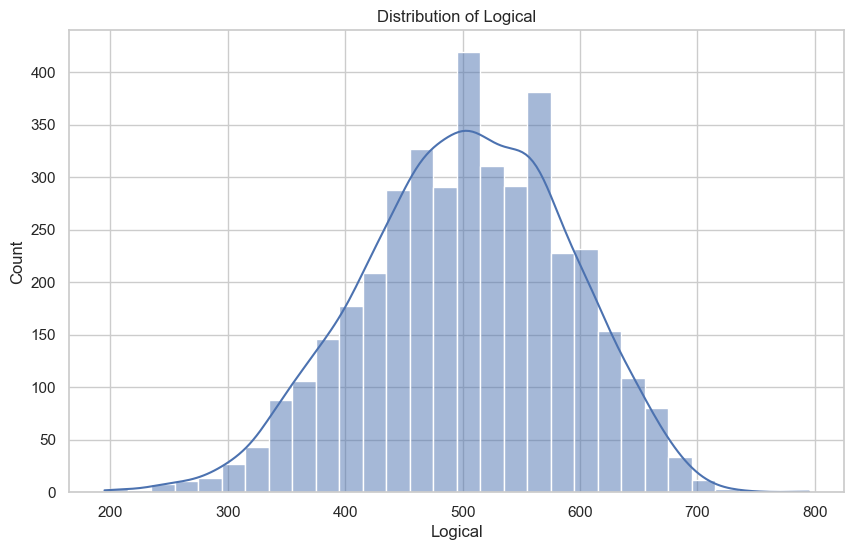

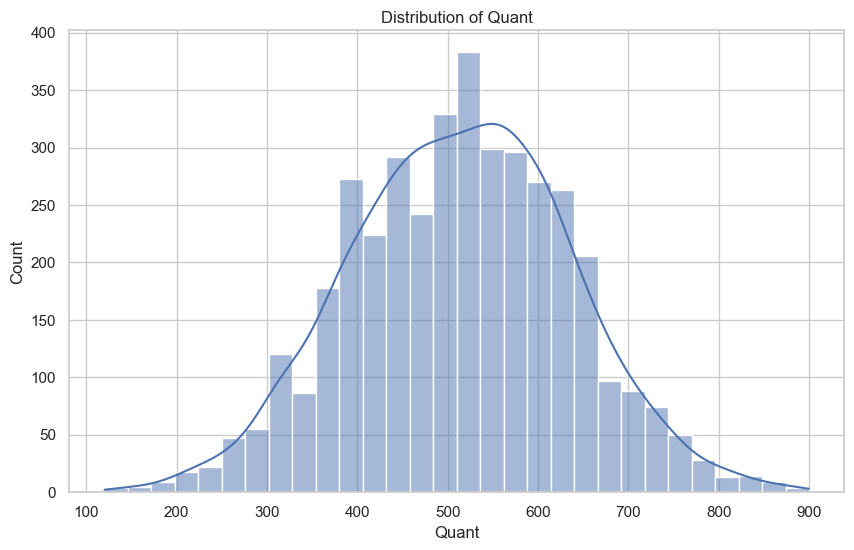

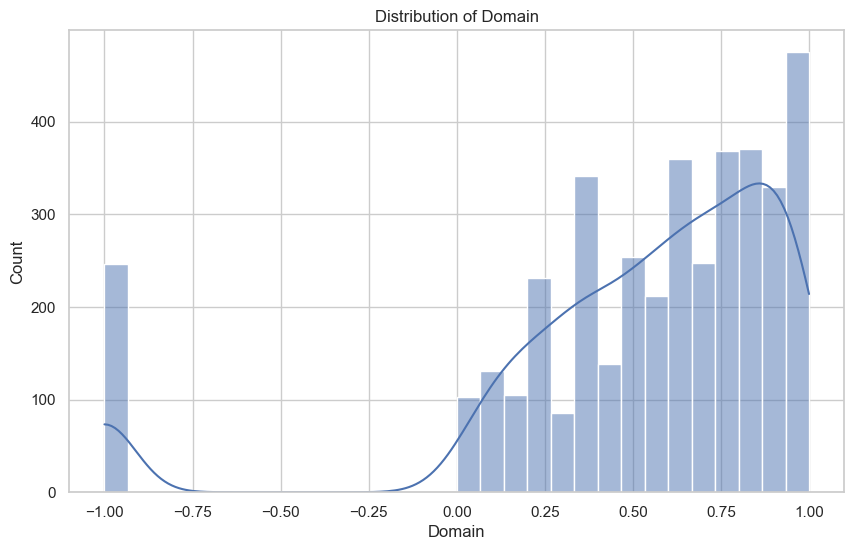

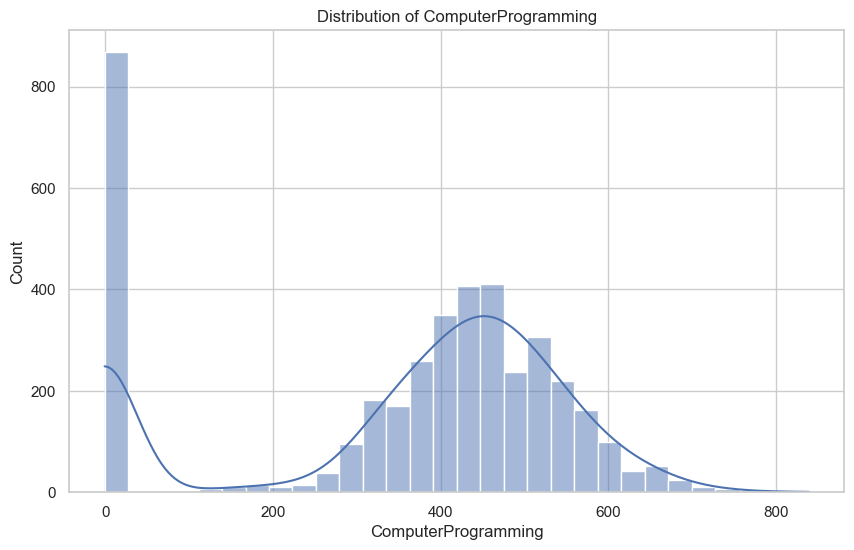

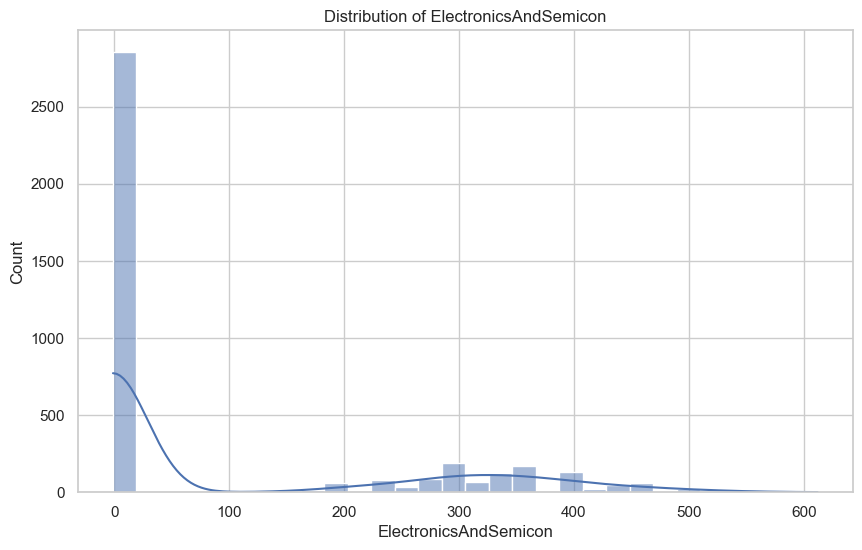

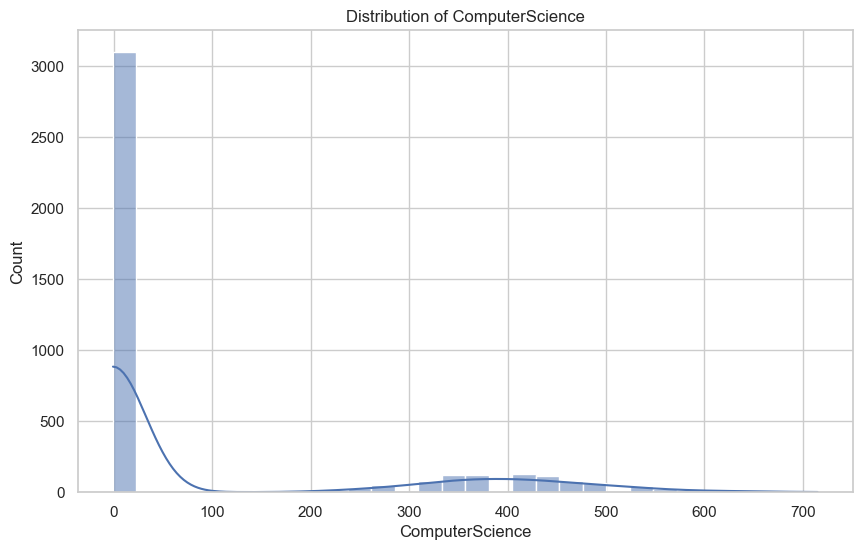

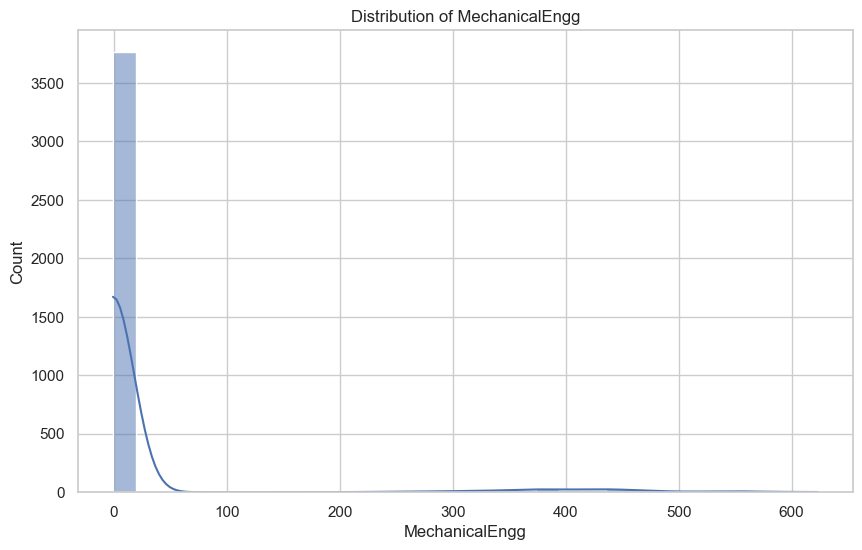

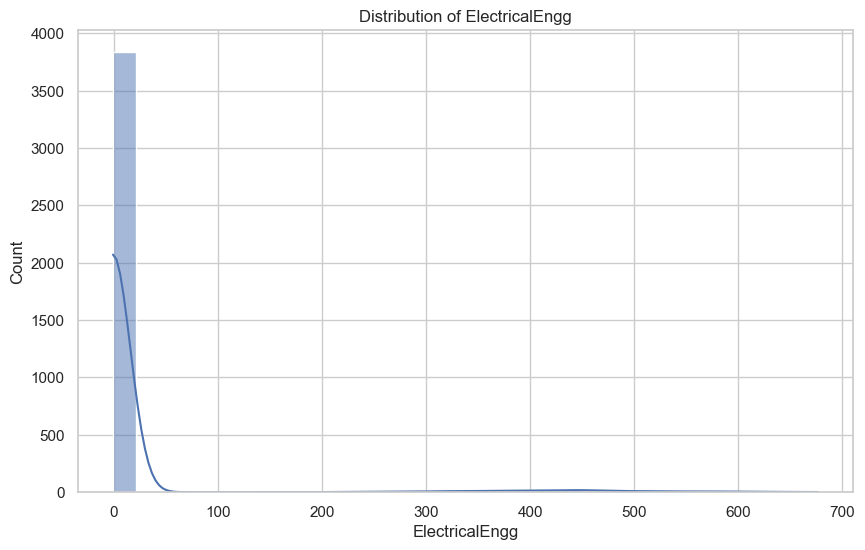

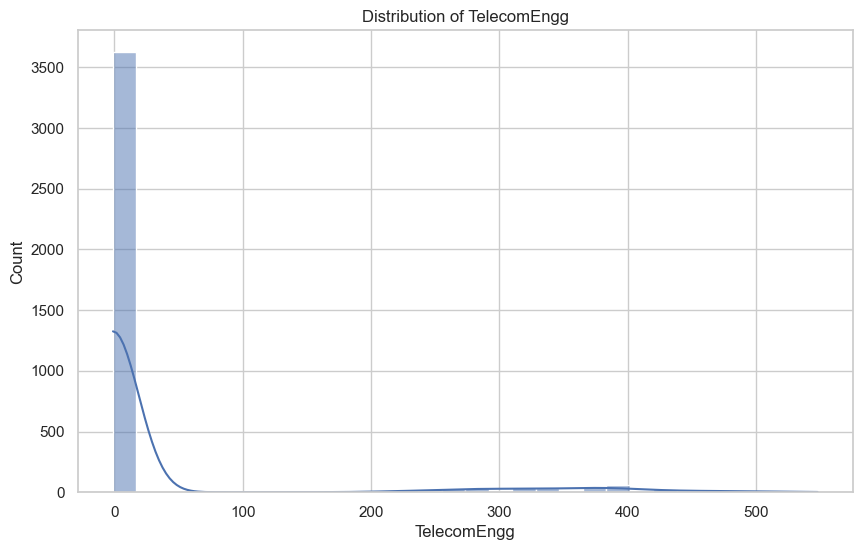

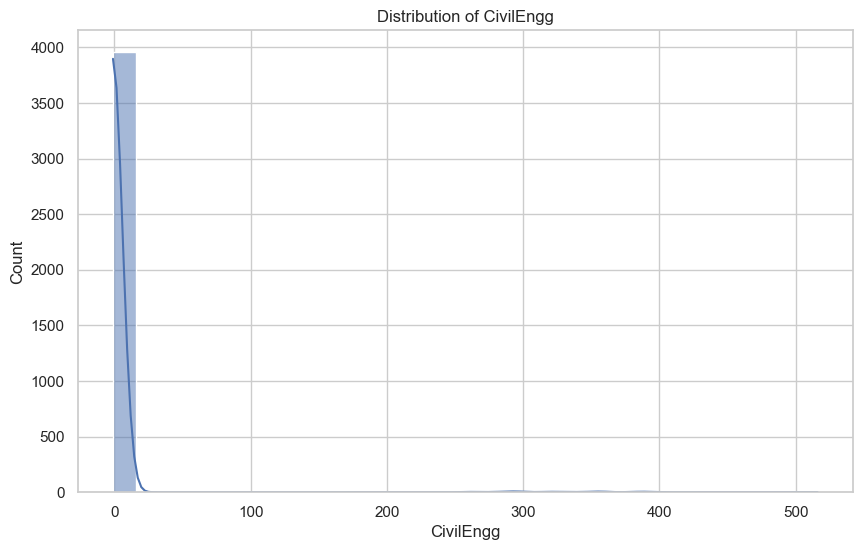

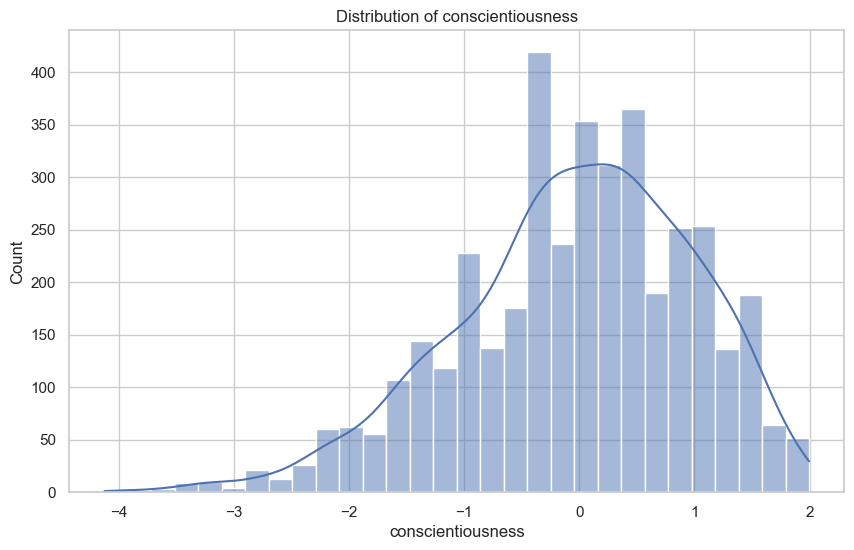

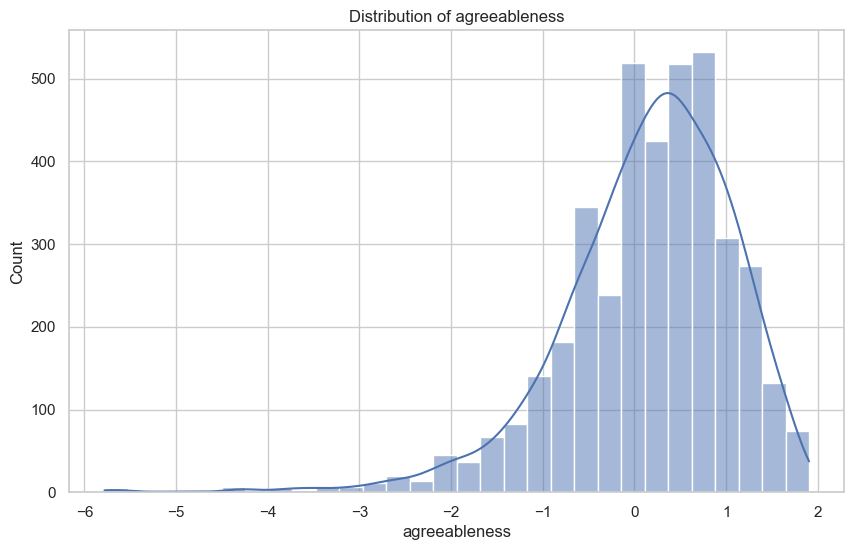

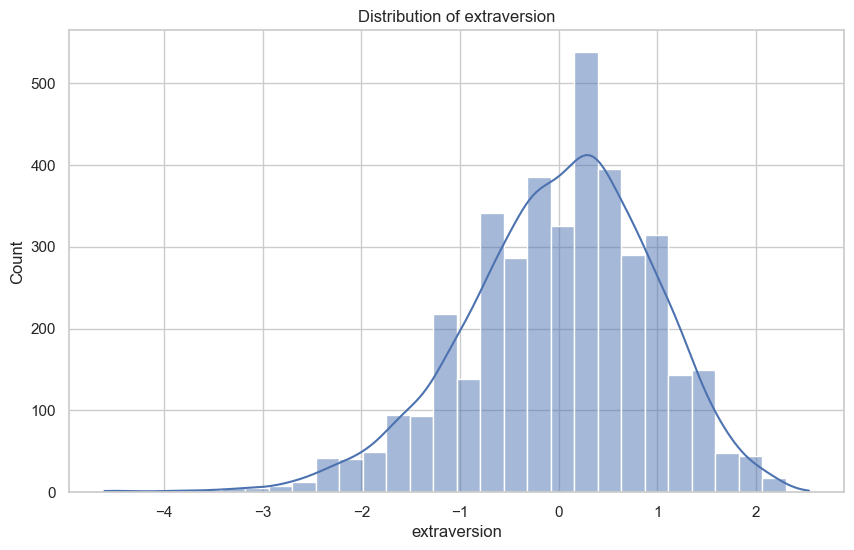

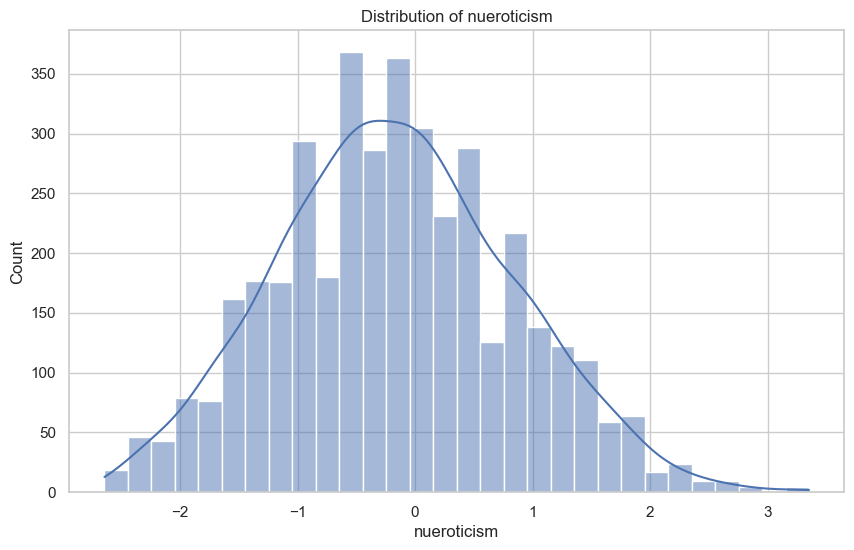

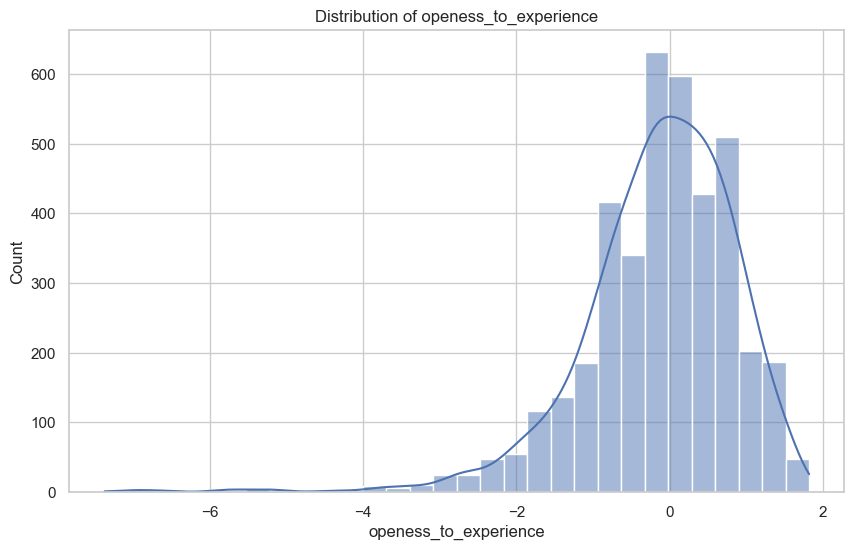

In [82]:
# PDFs and Histograms for Numerical Columns
for col in df_n:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

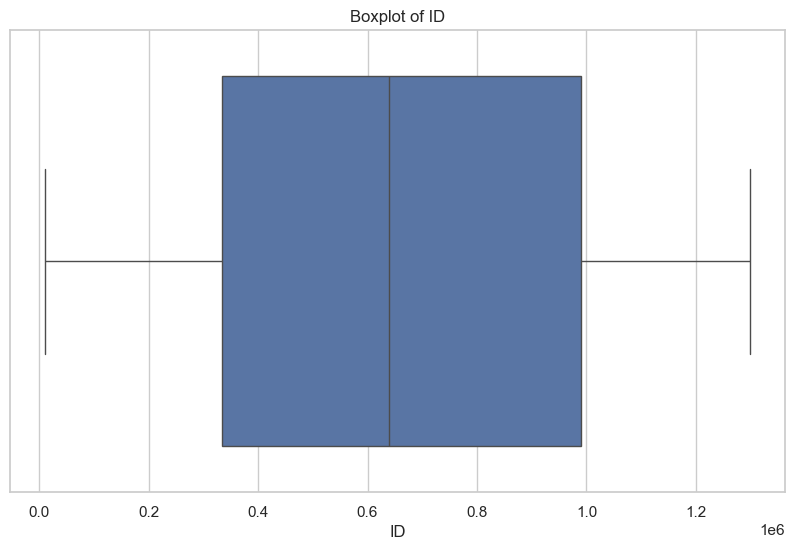

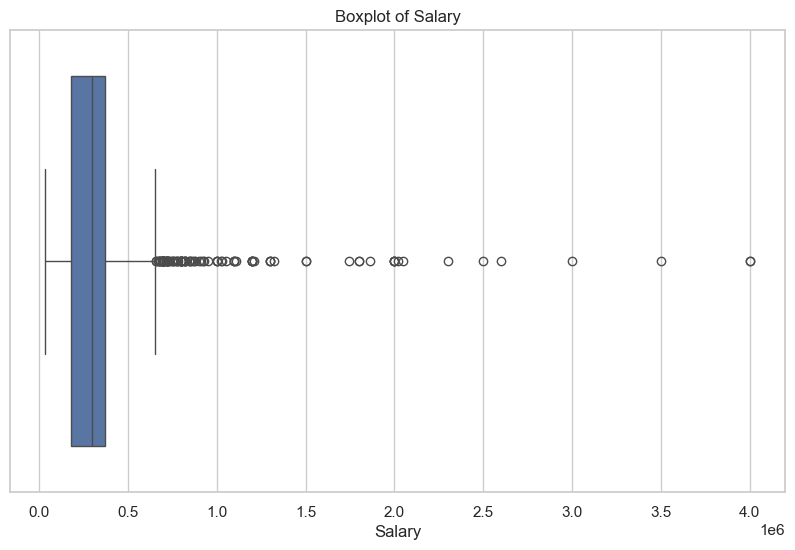

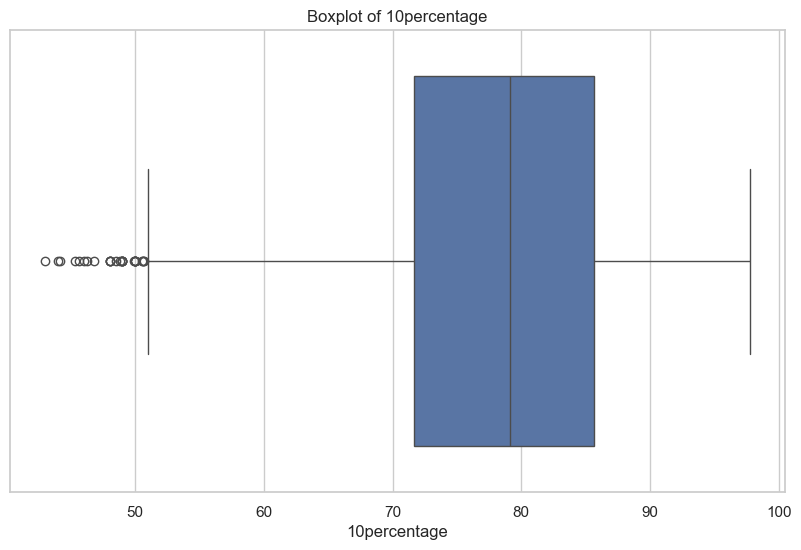

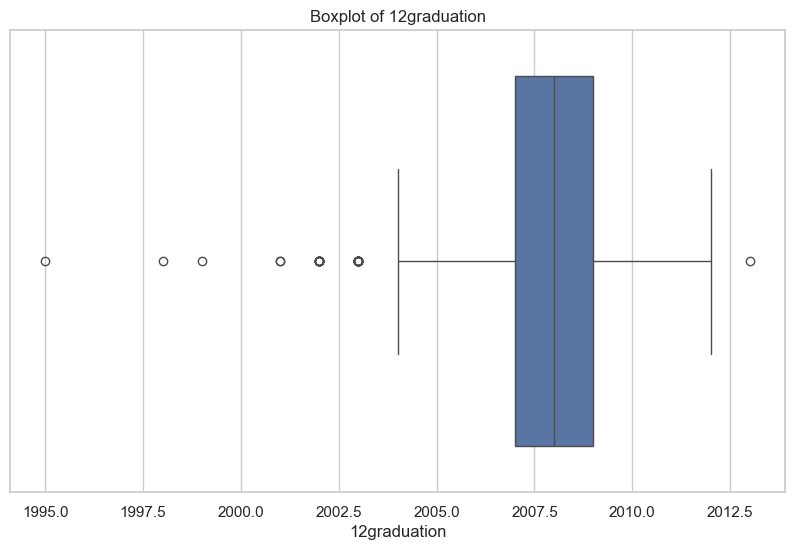

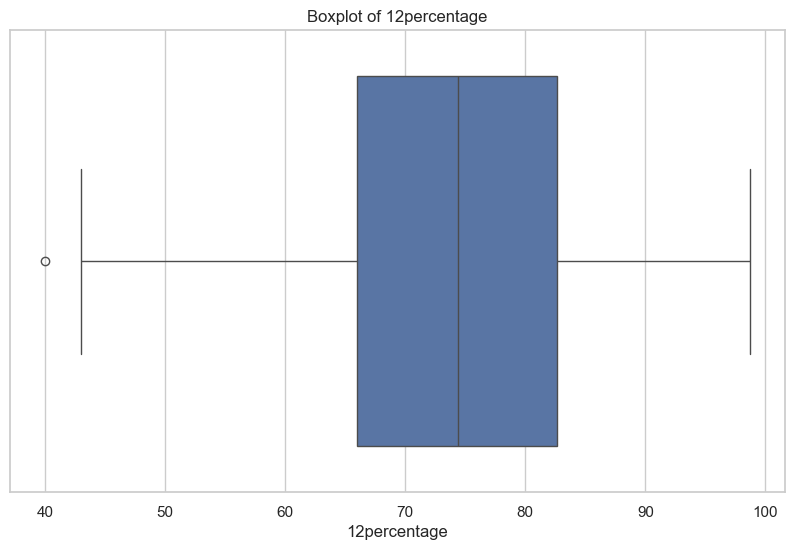

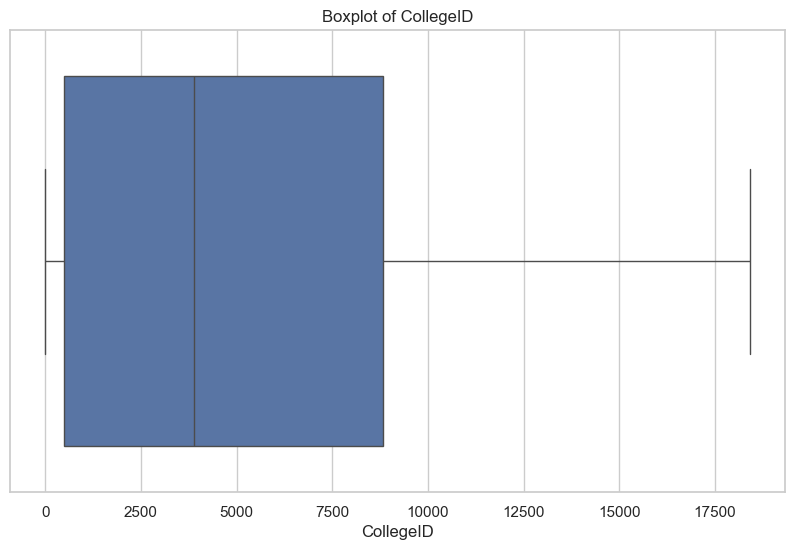

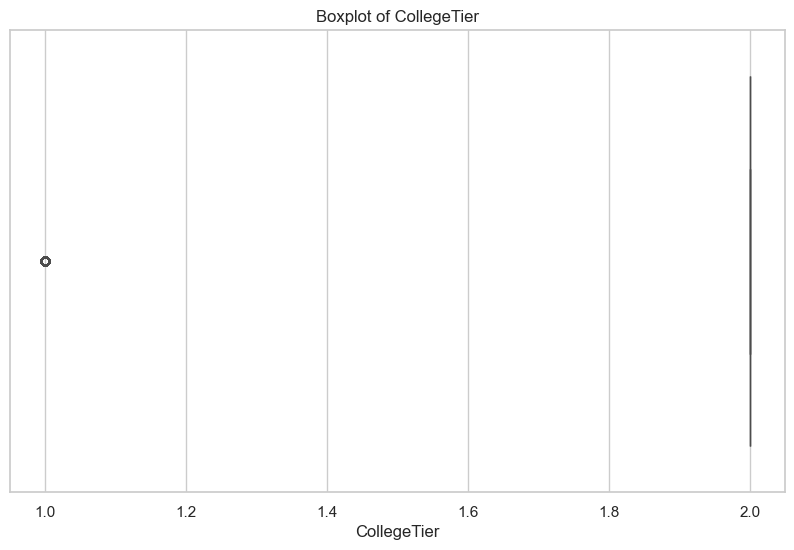

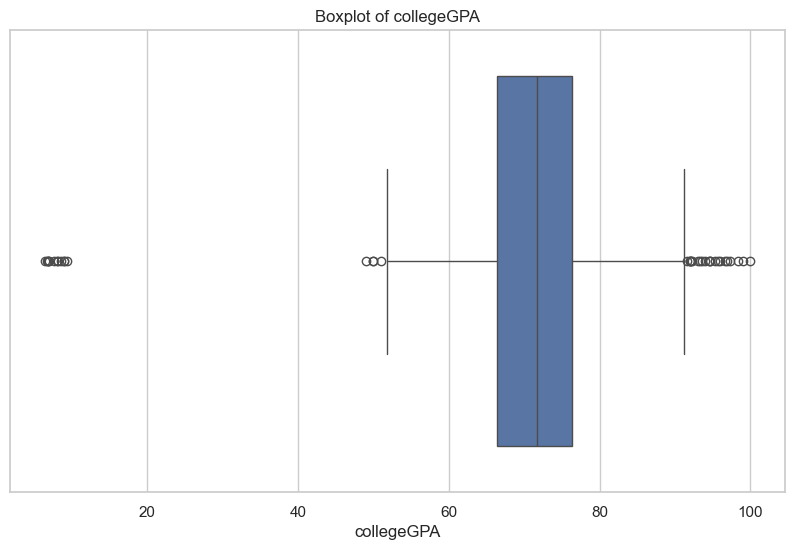

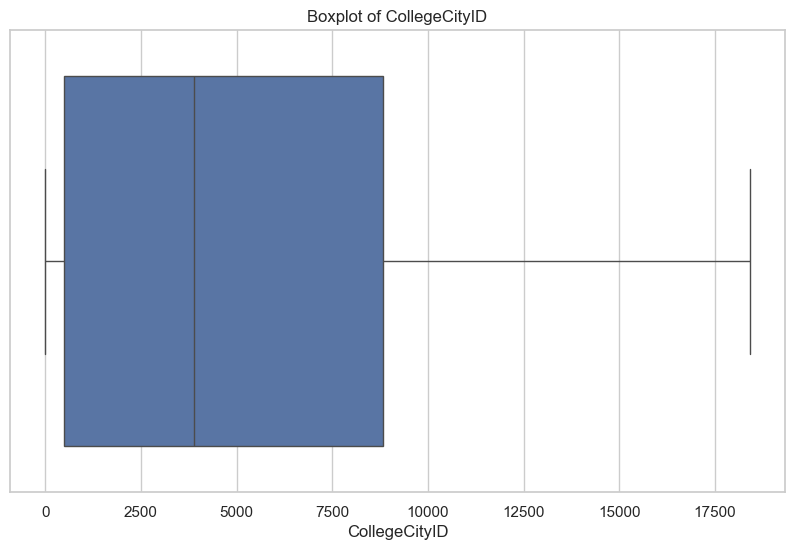

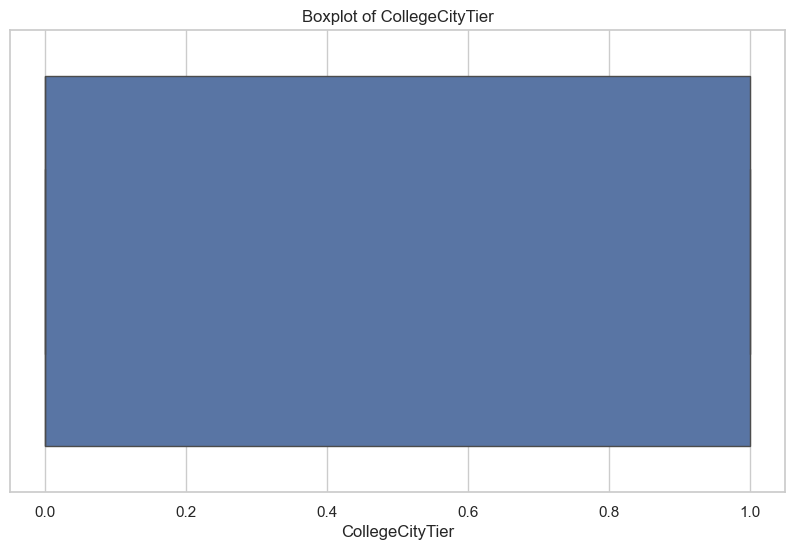

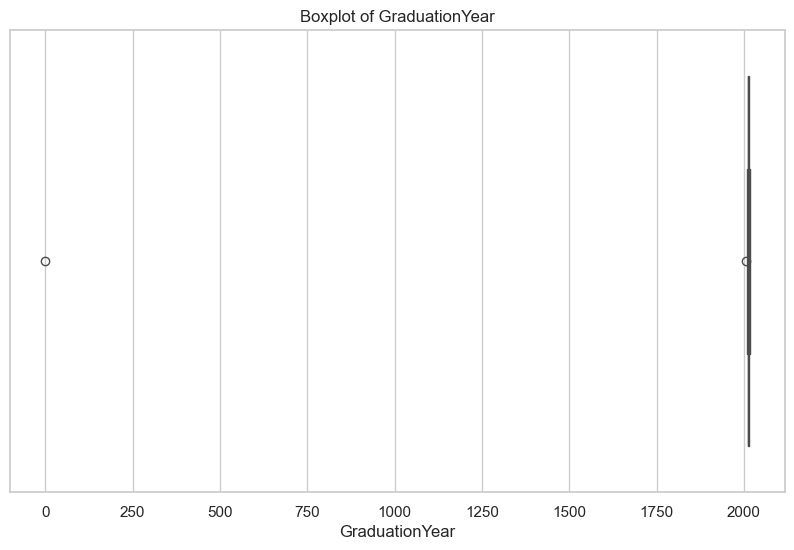

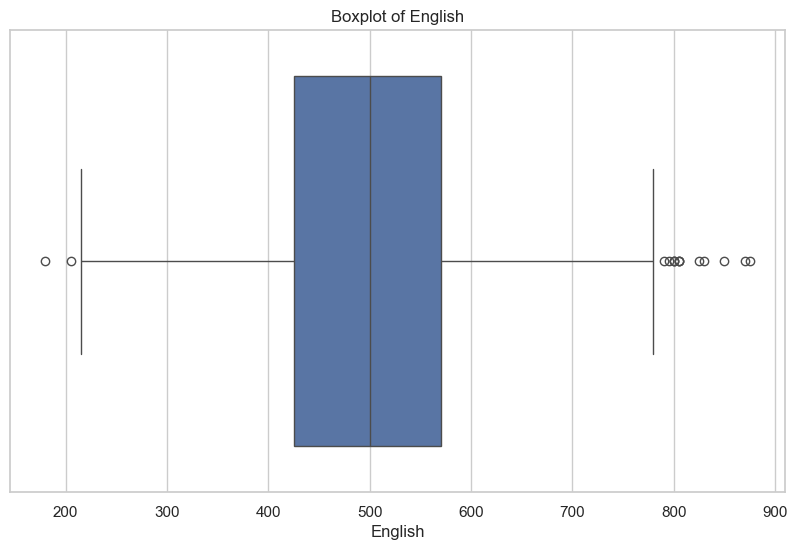

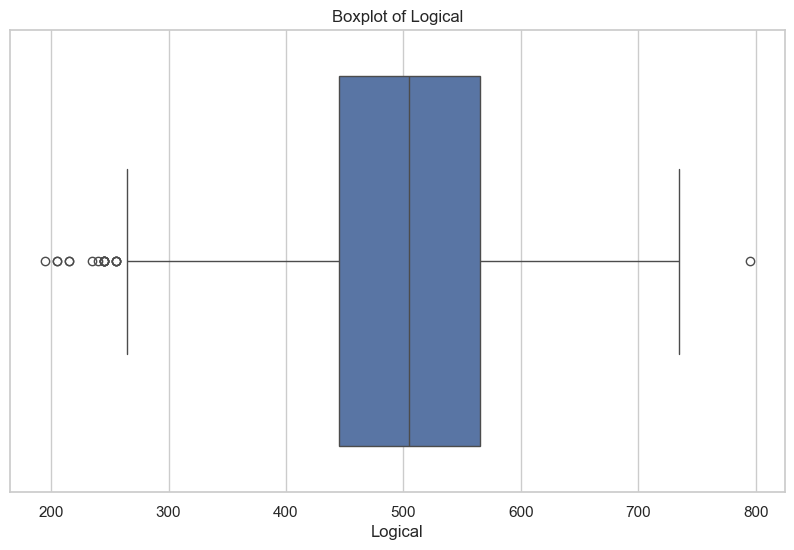

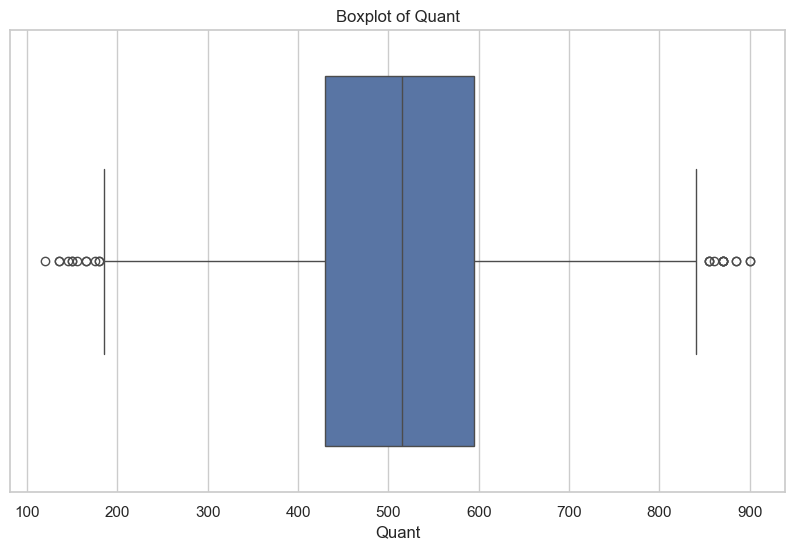

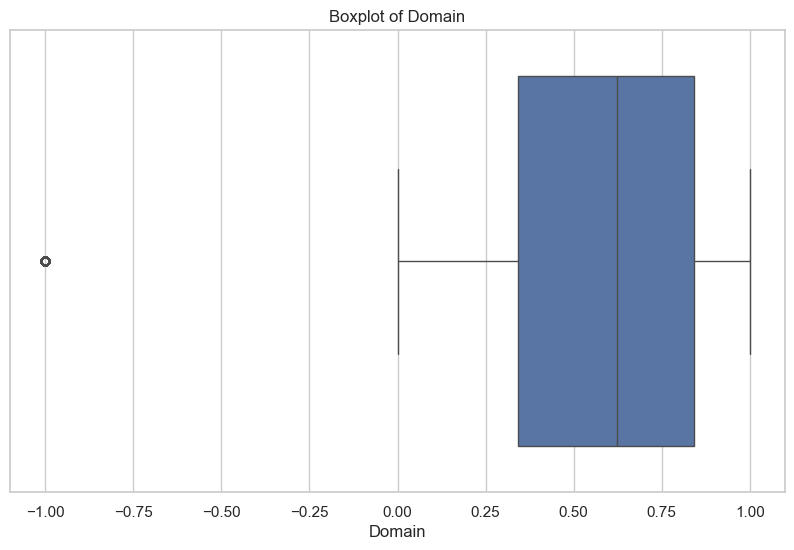

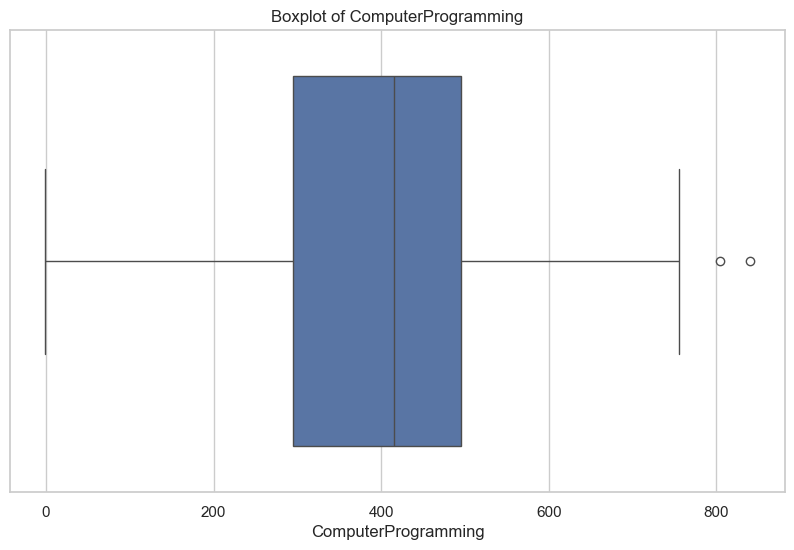

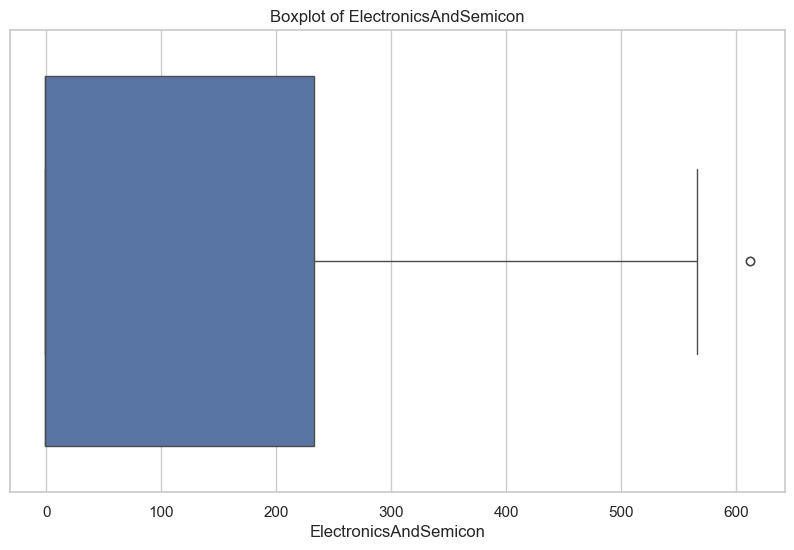

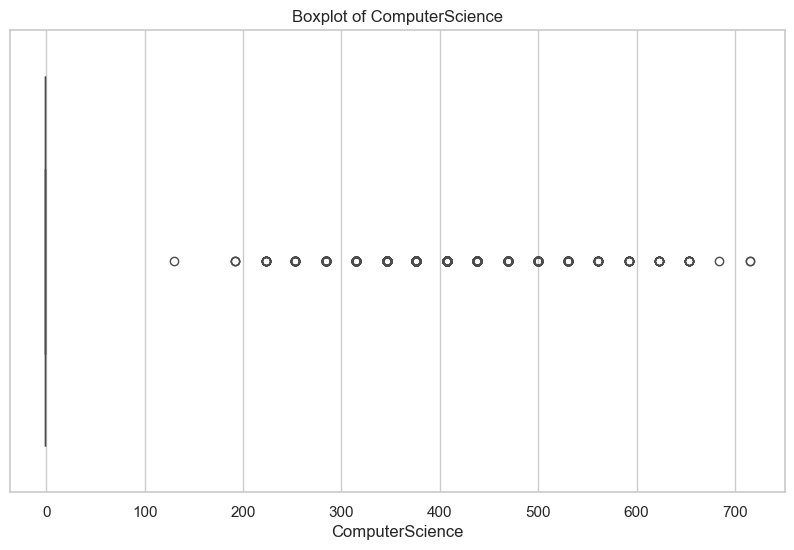

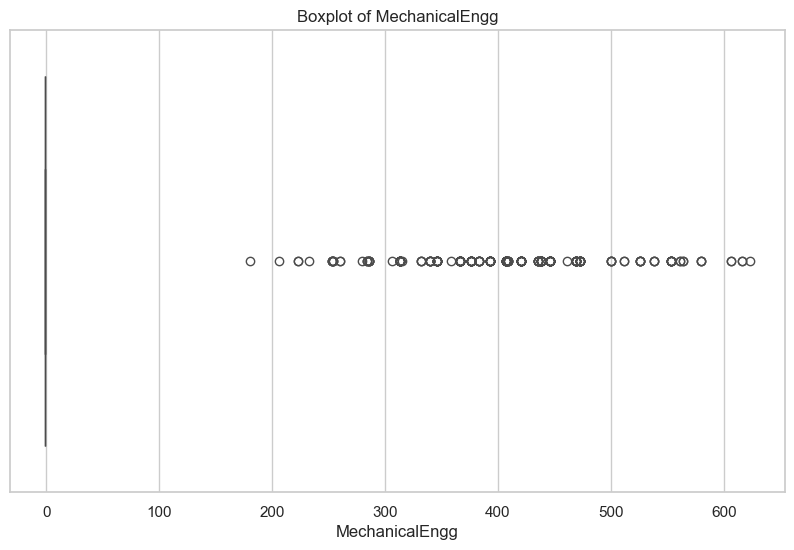

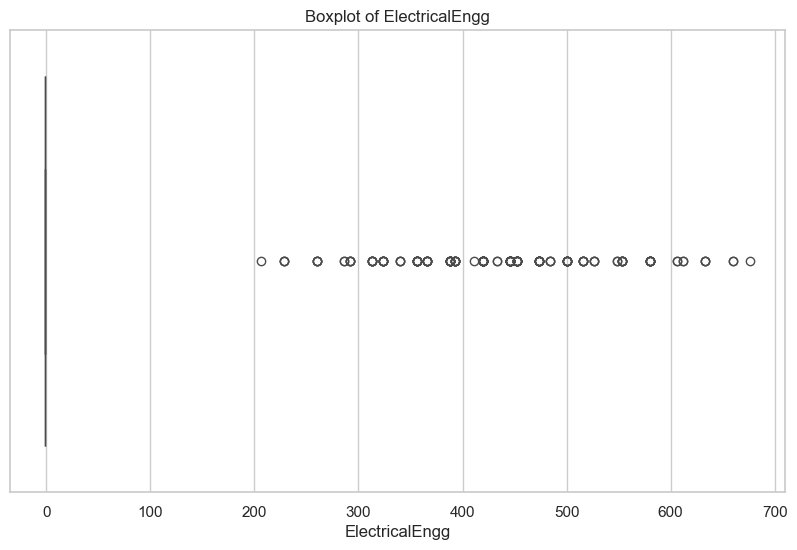

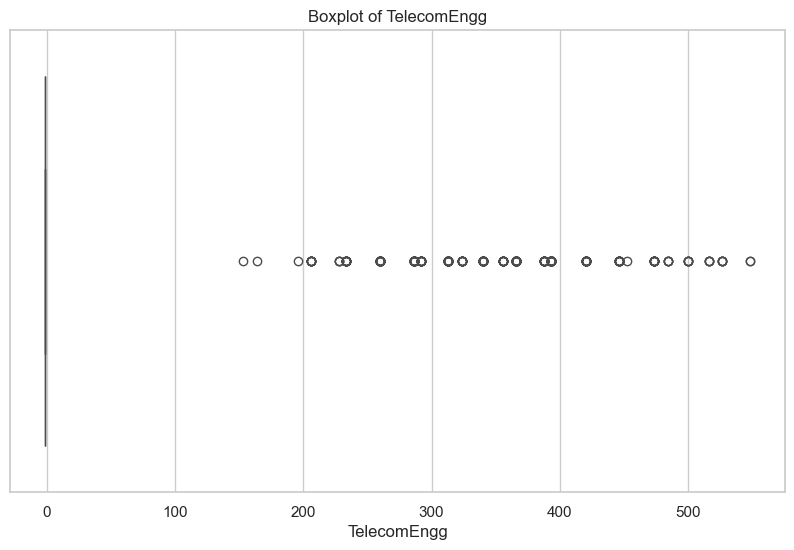

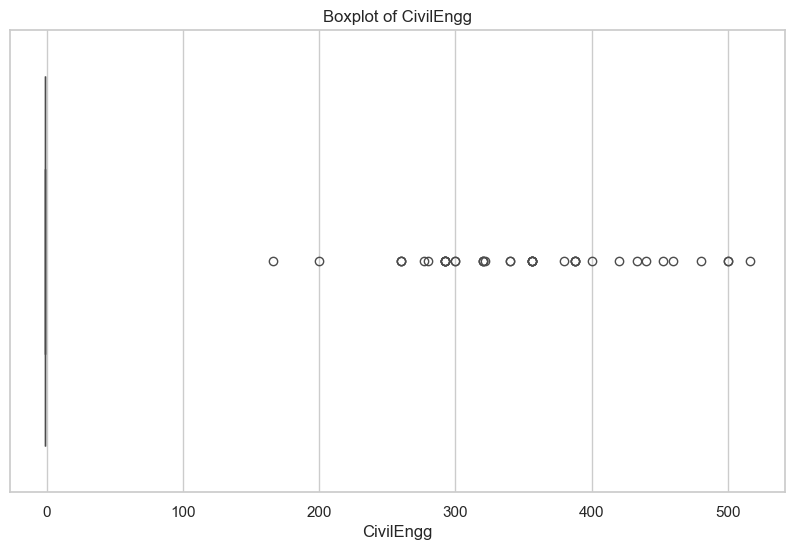

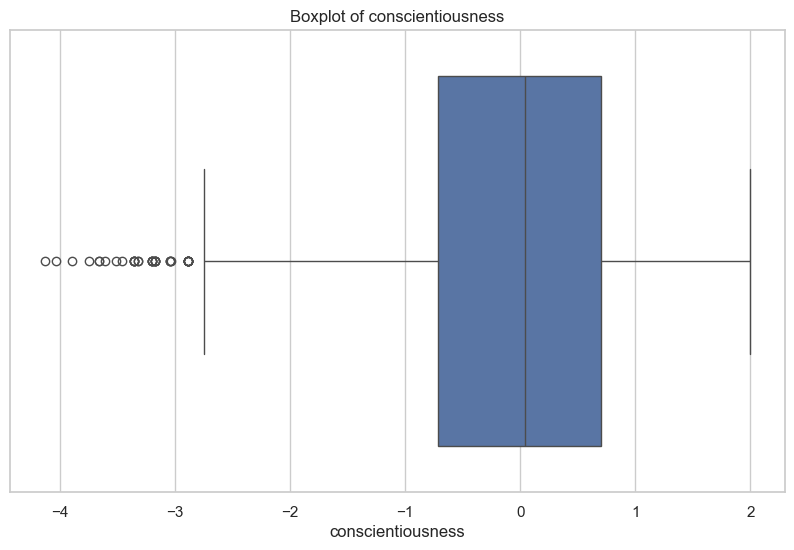

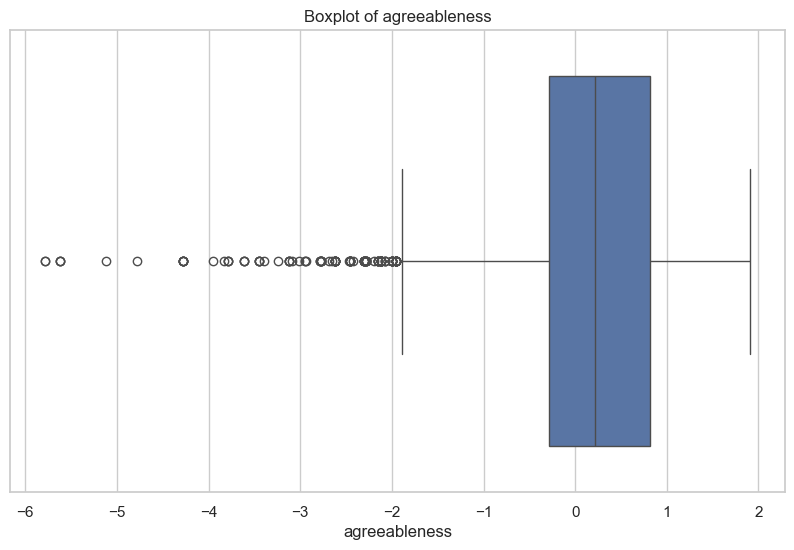

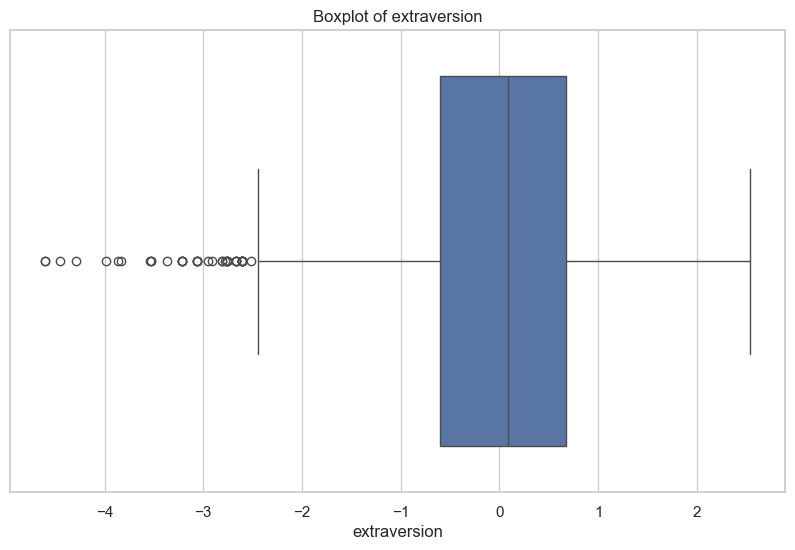

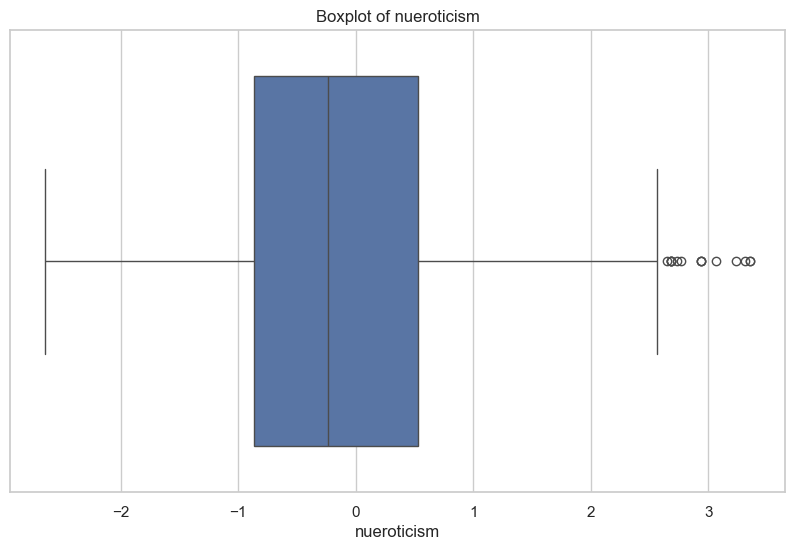

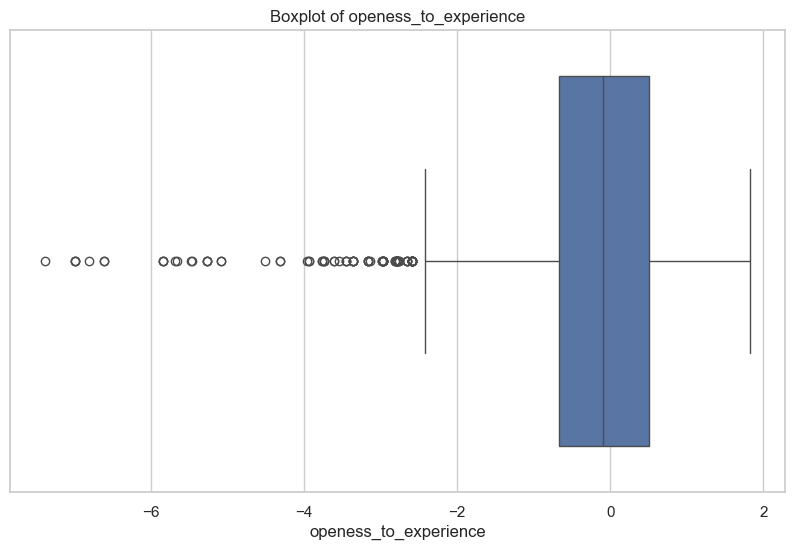

In [83]:
# Boxplots for Numerical Columns
for col in df_n:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

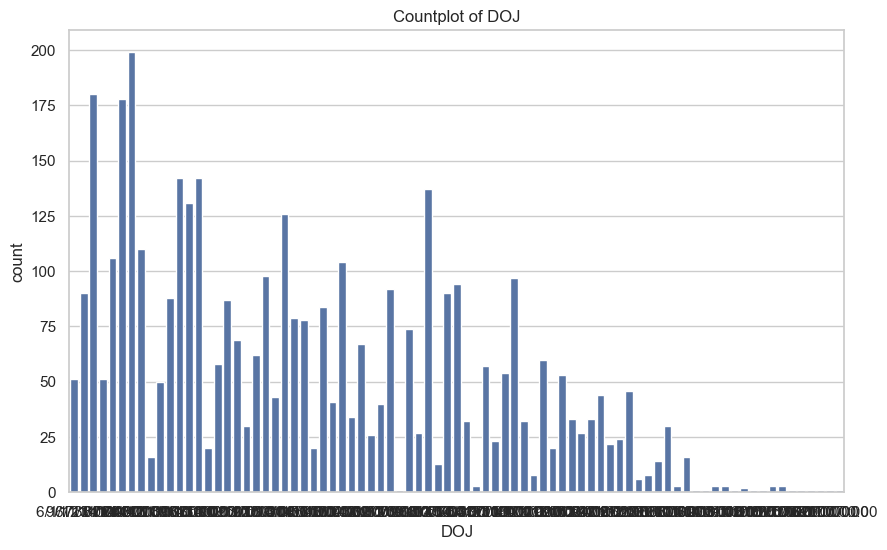

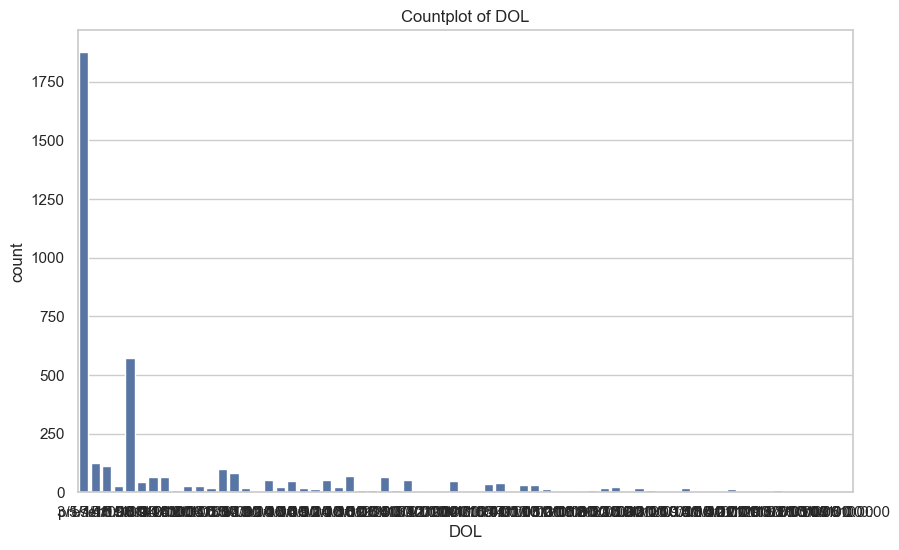

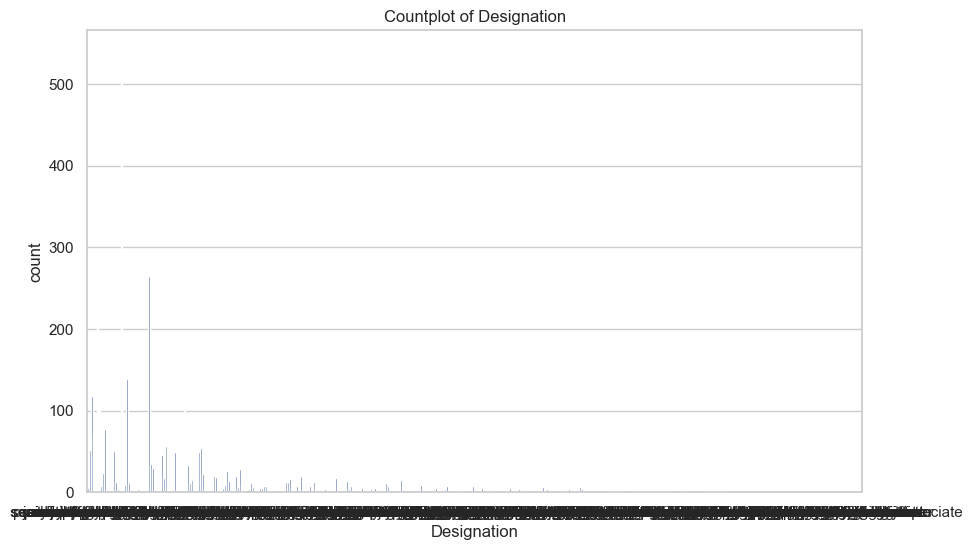

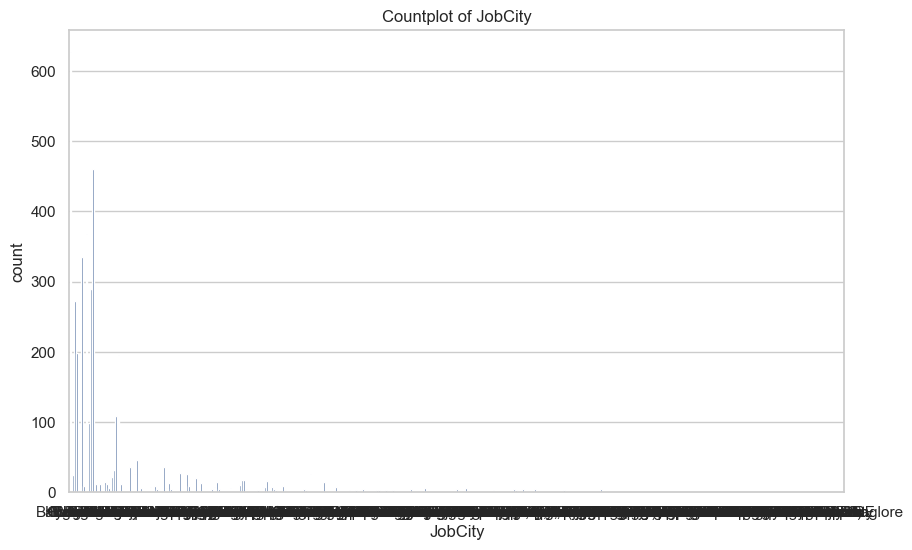

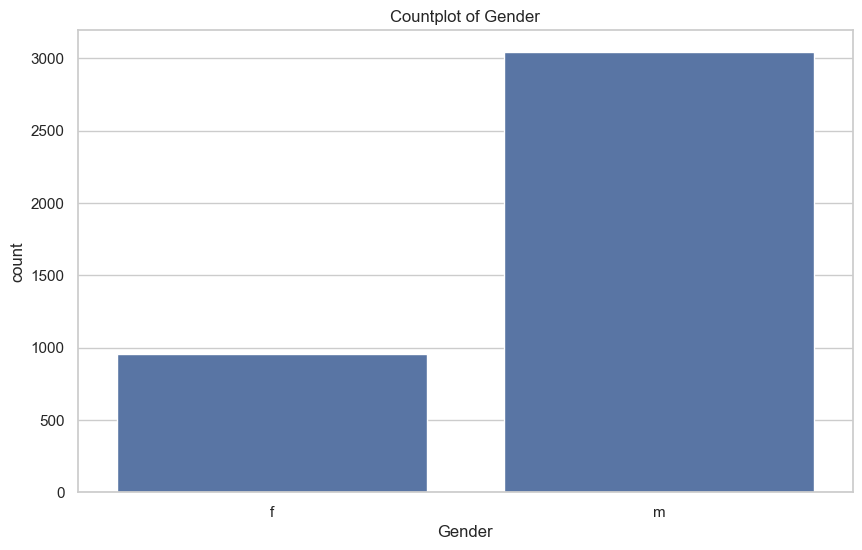

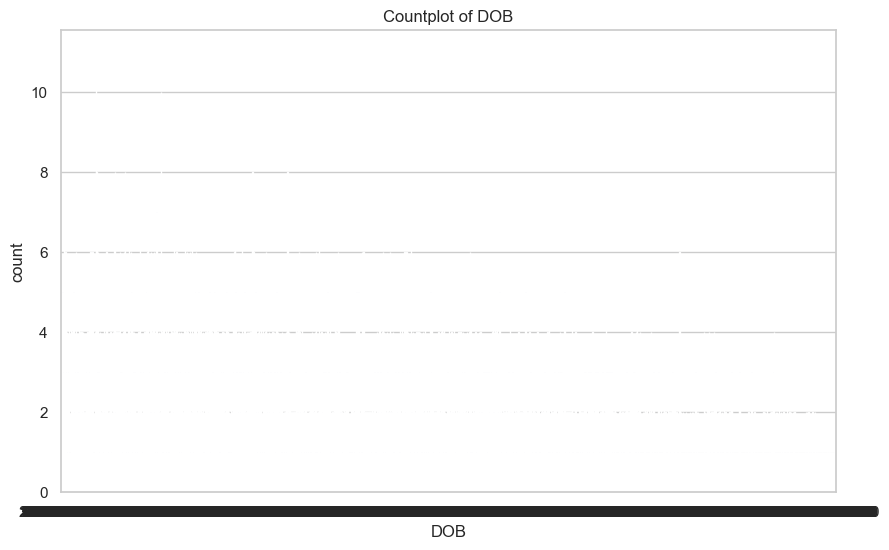

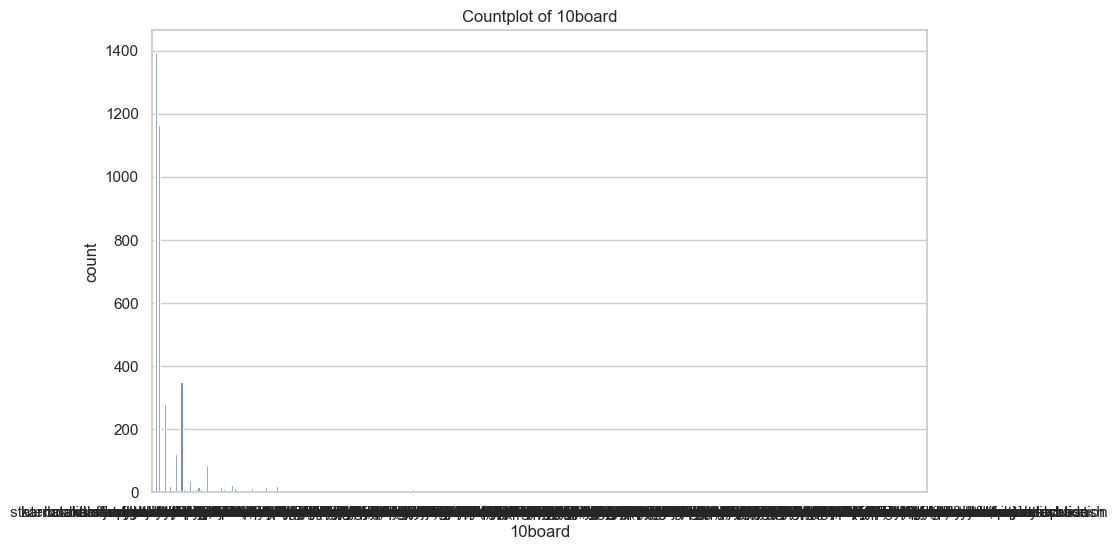

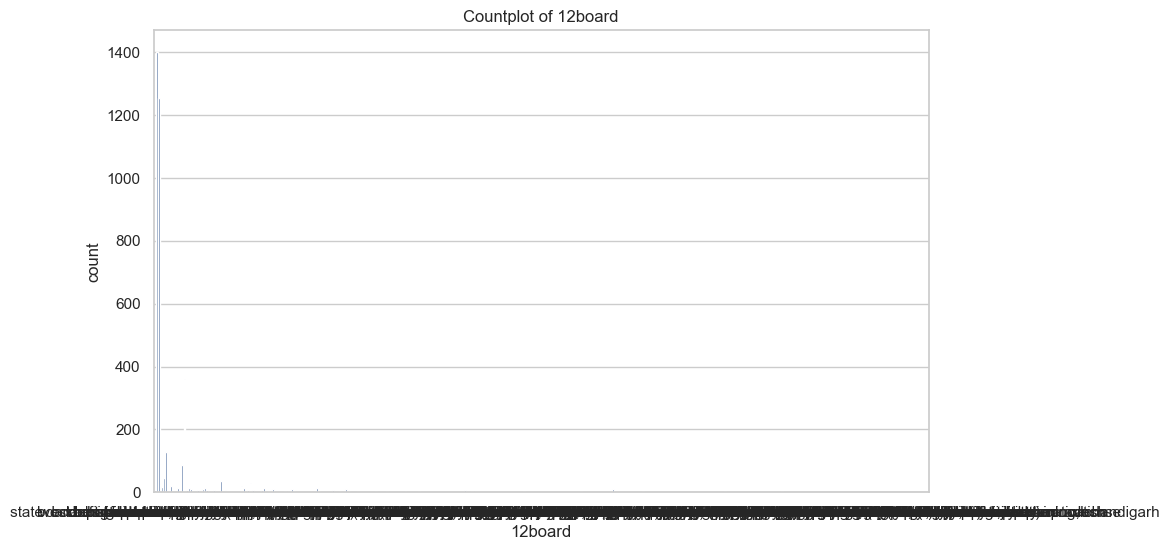

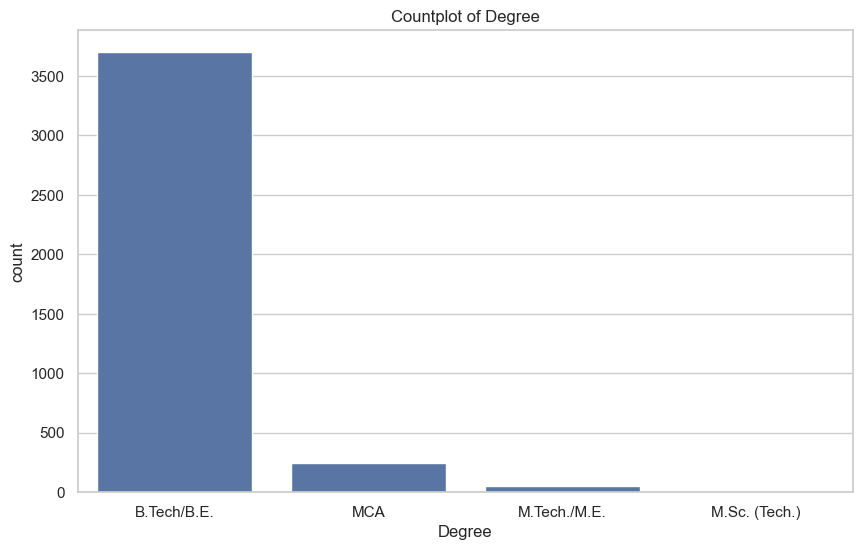

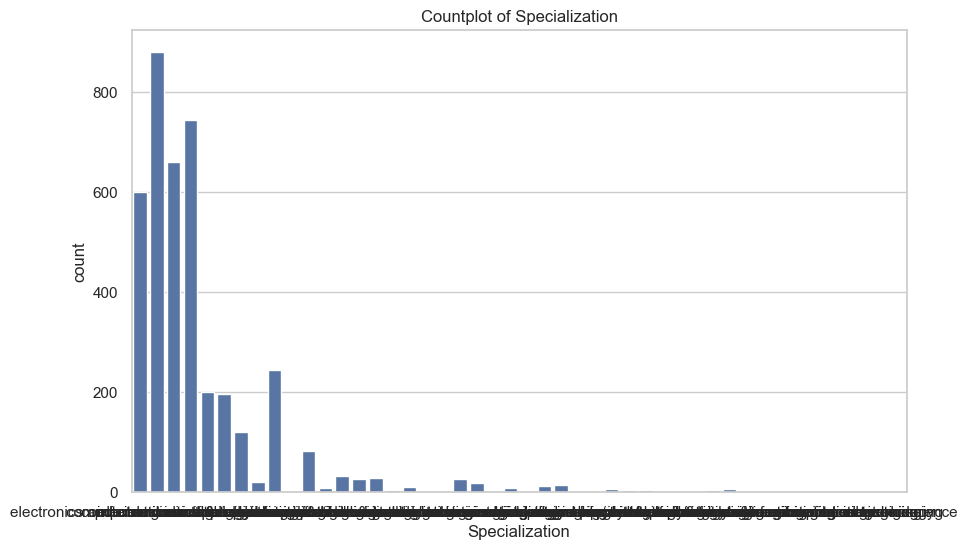

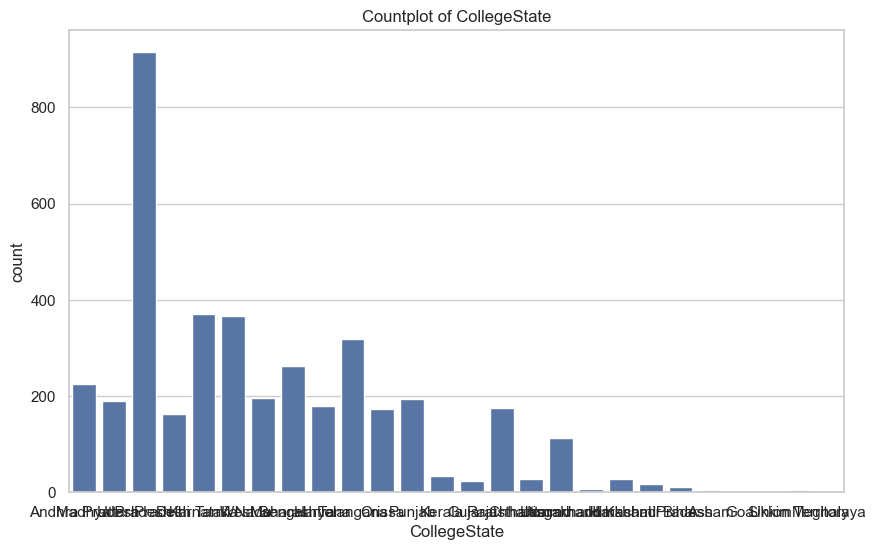

In [84]:
for col in df_o:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

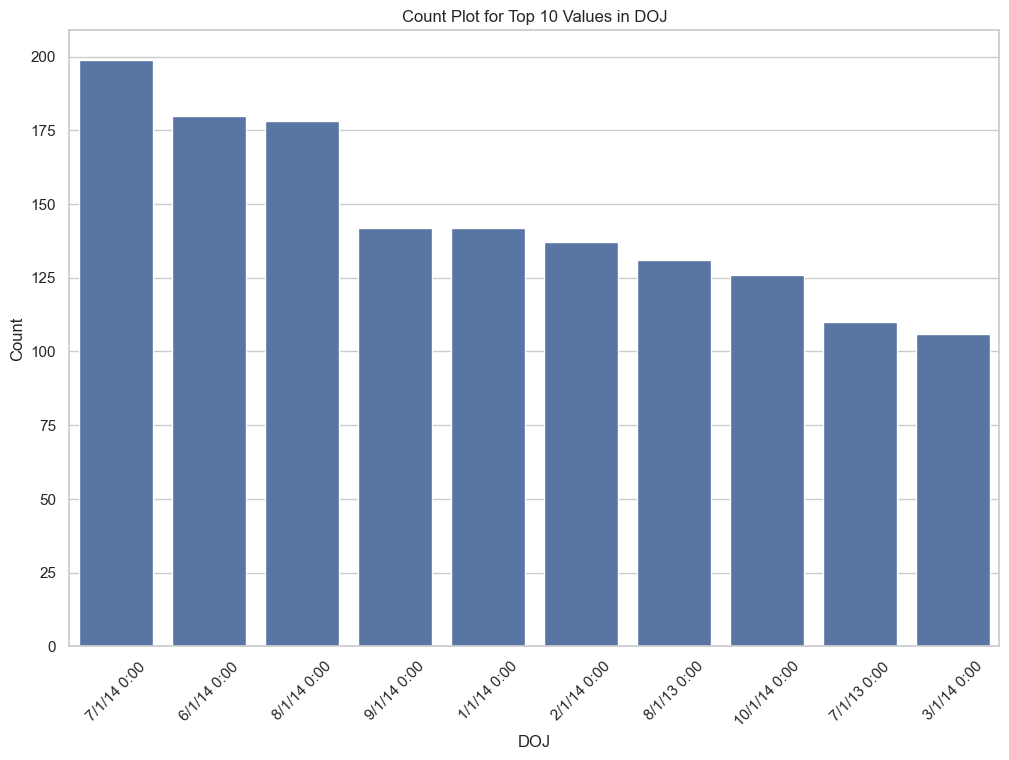

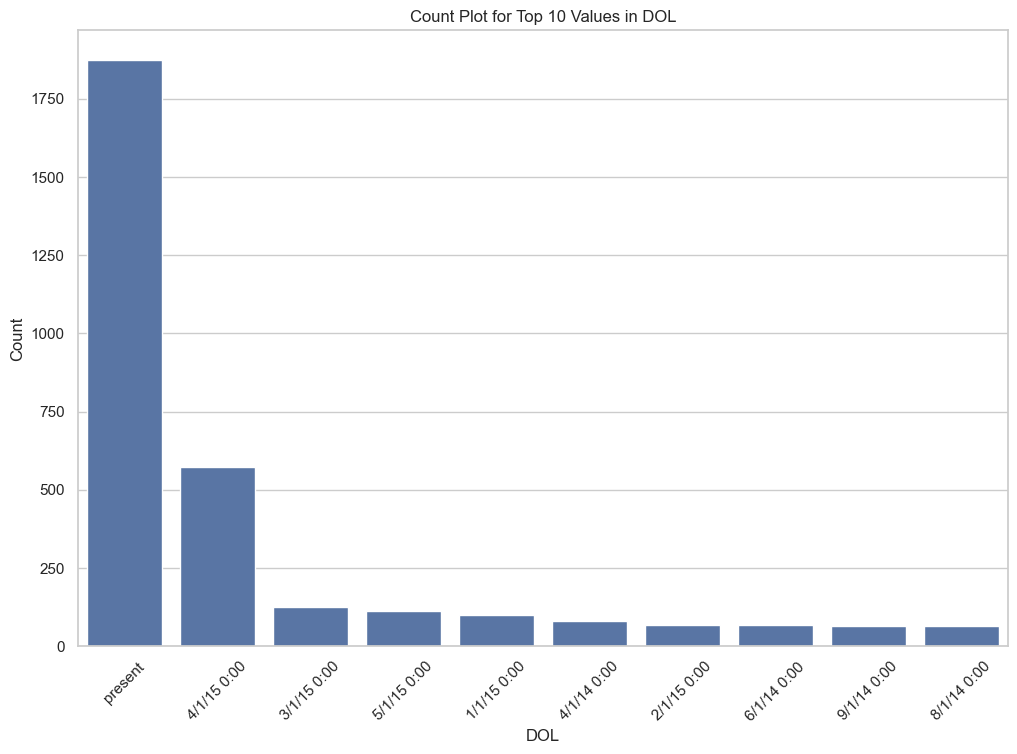

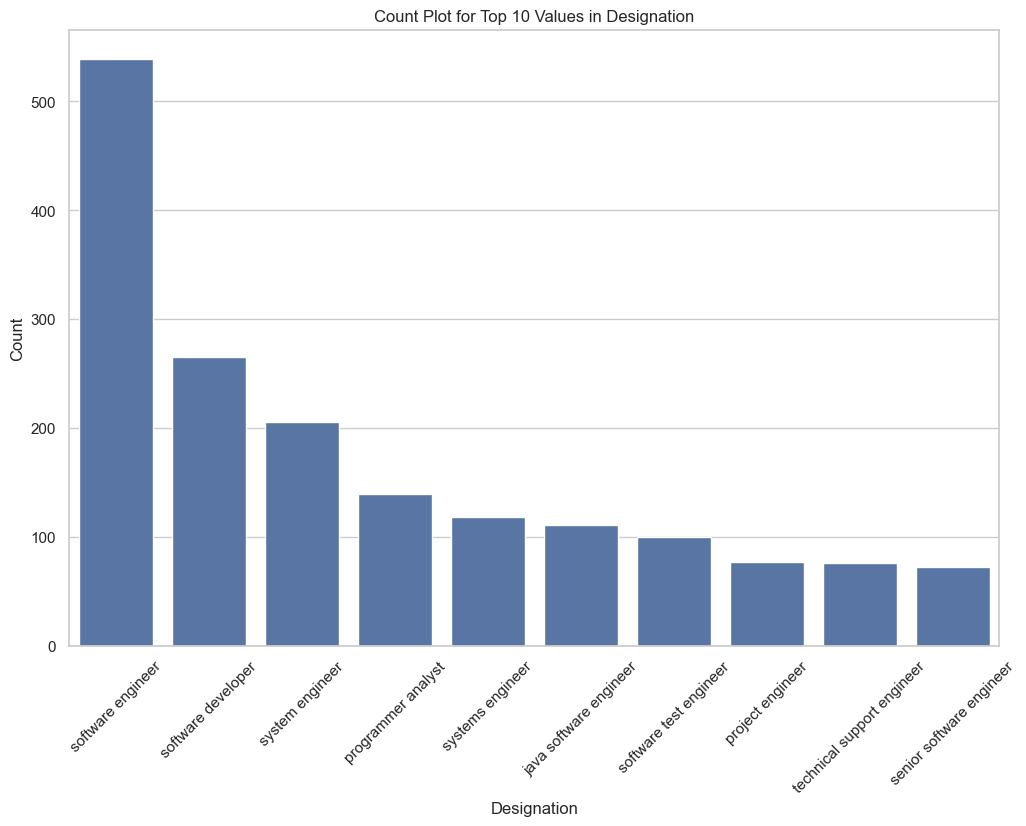

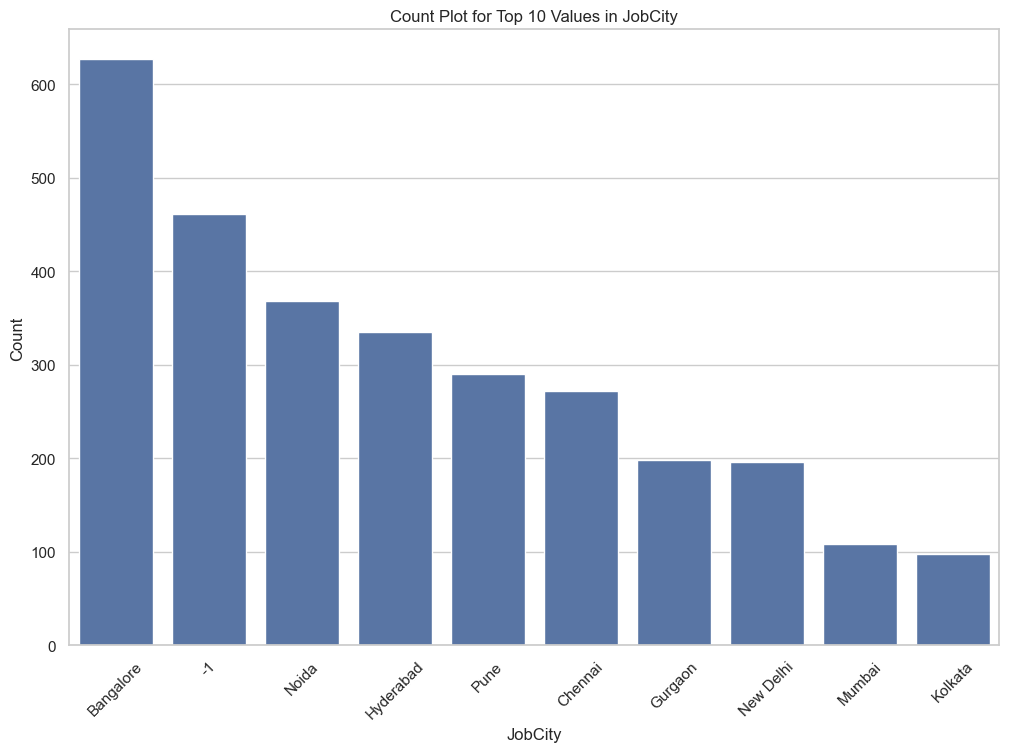

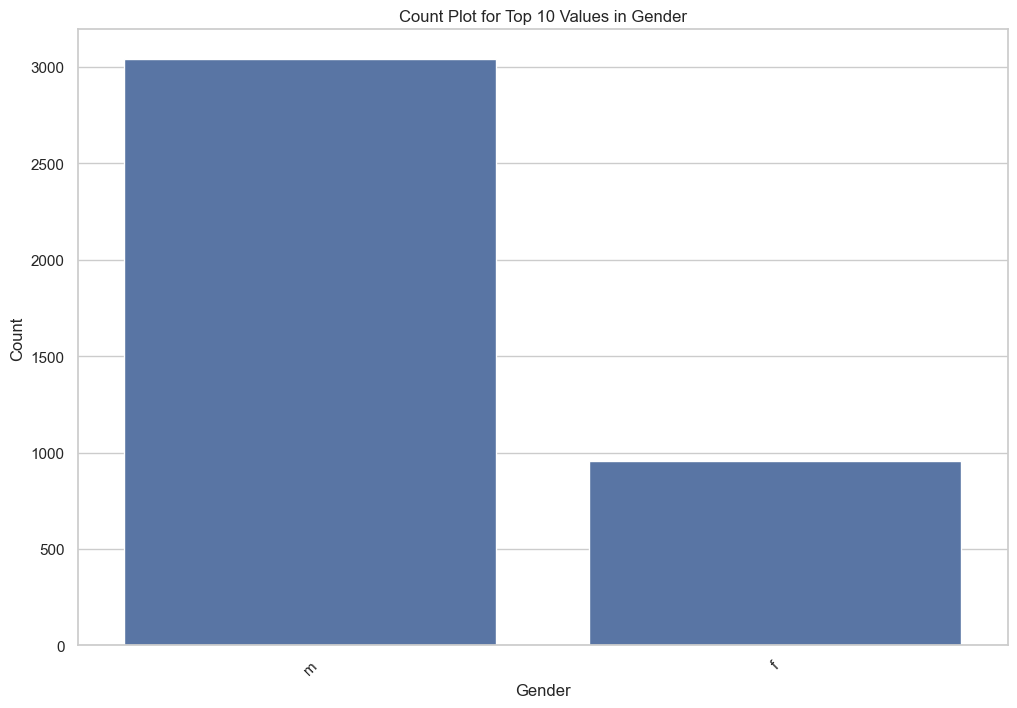

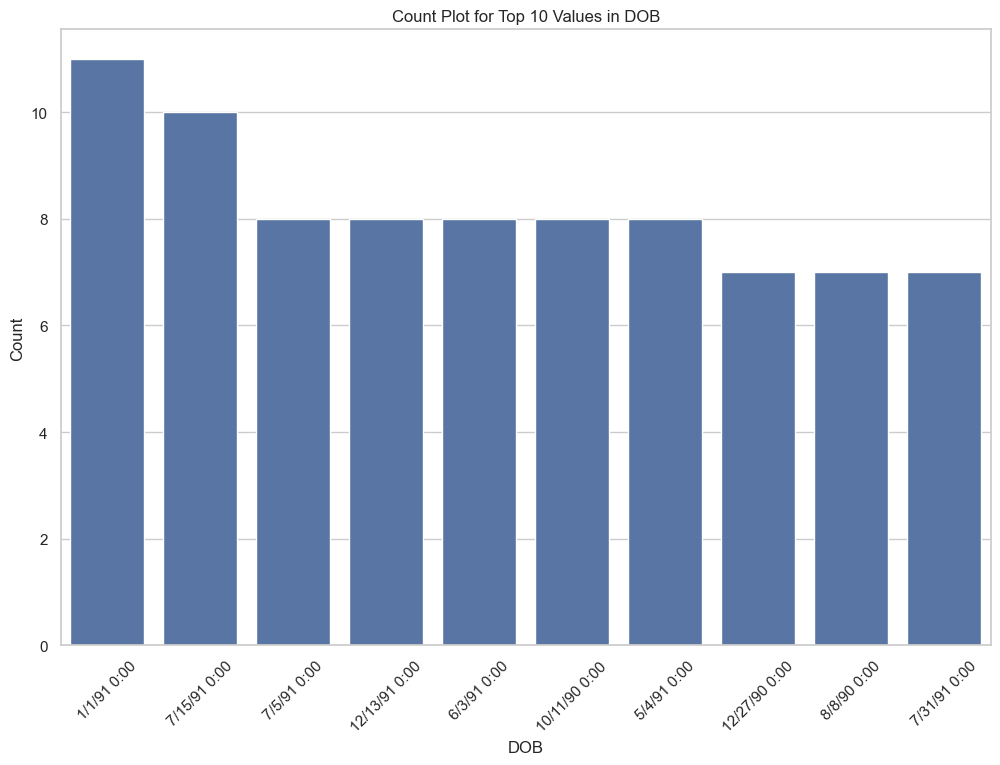

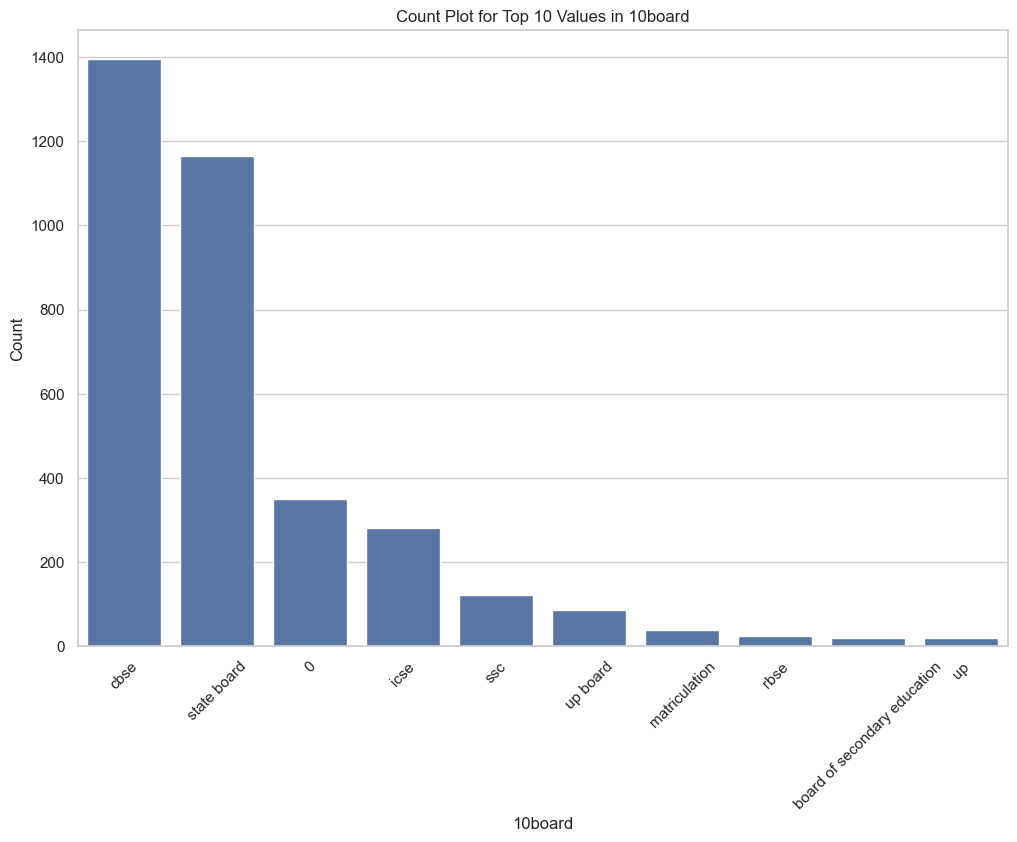

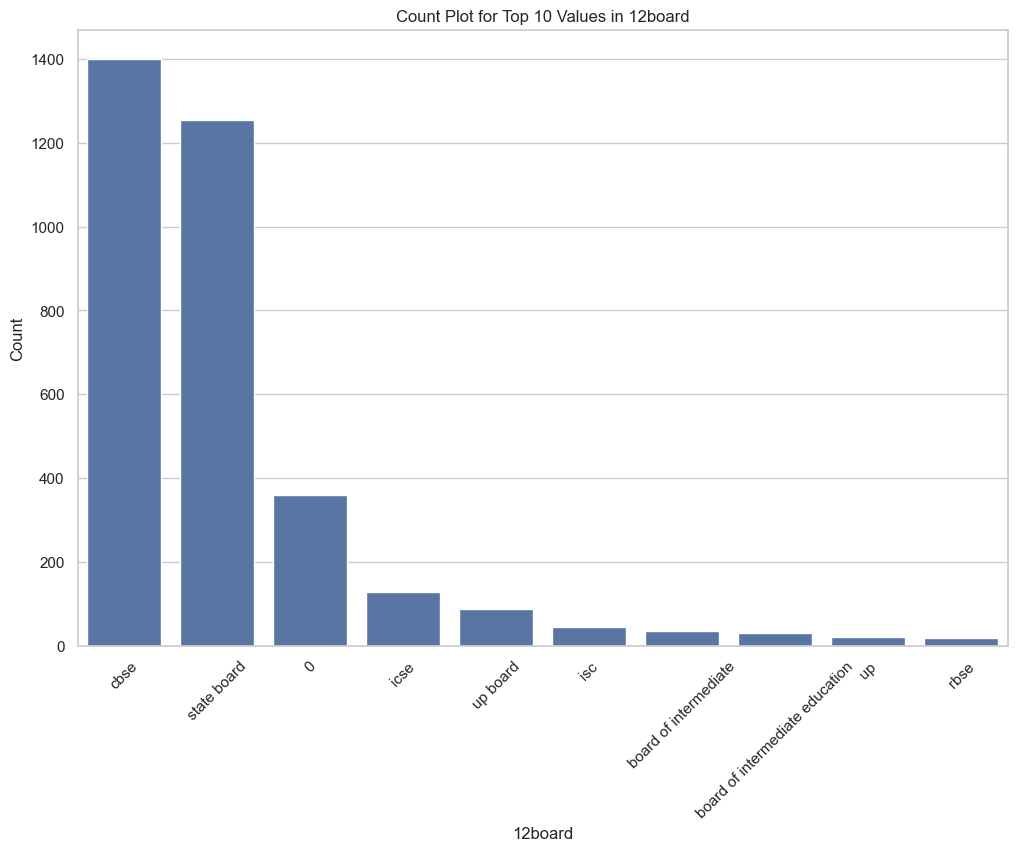

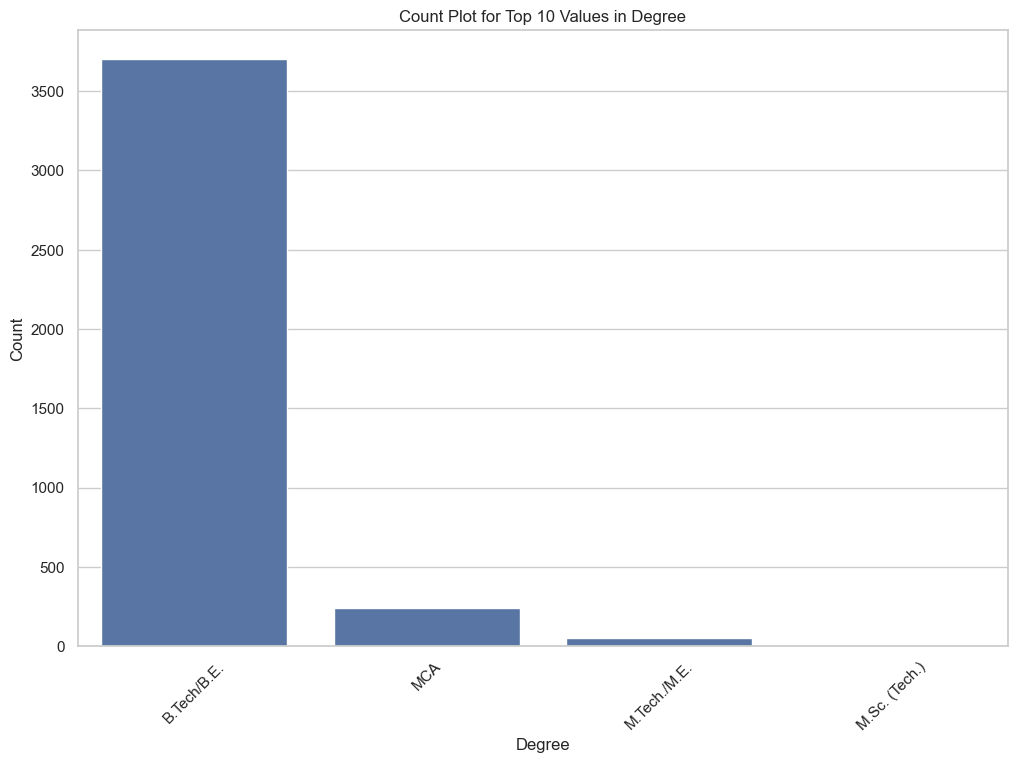

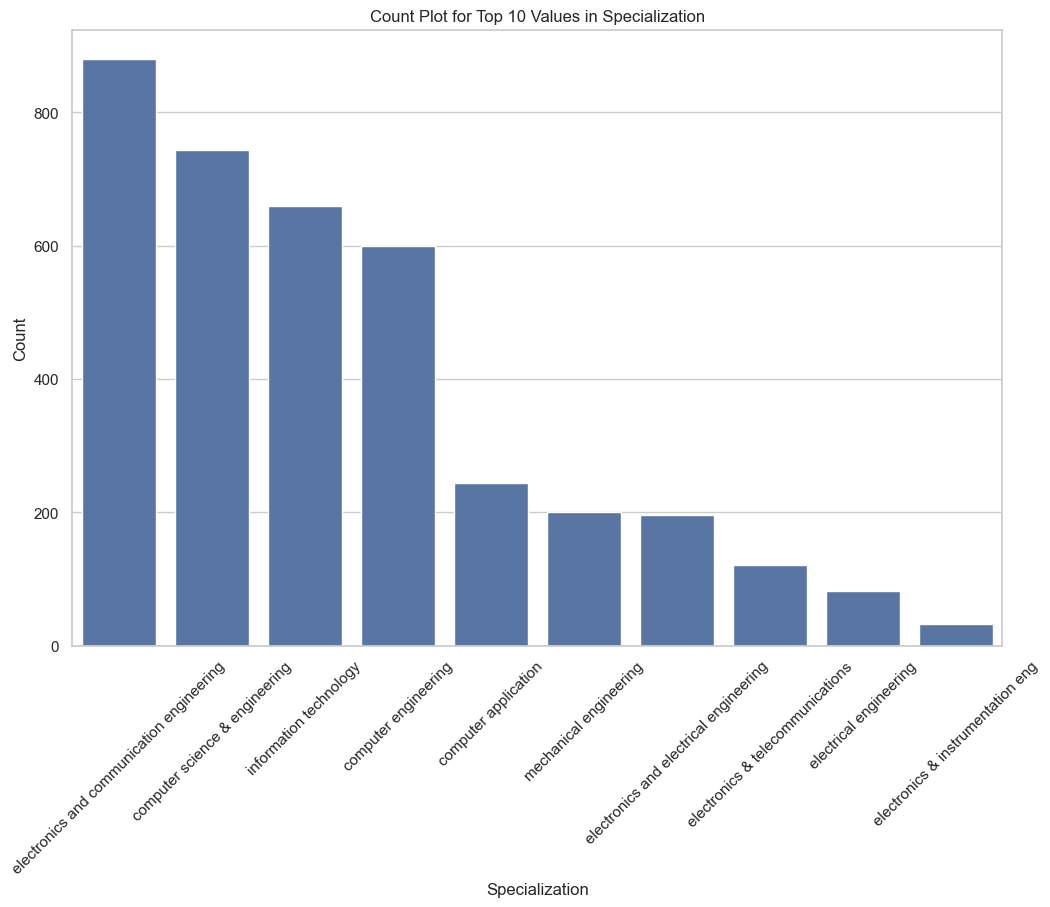

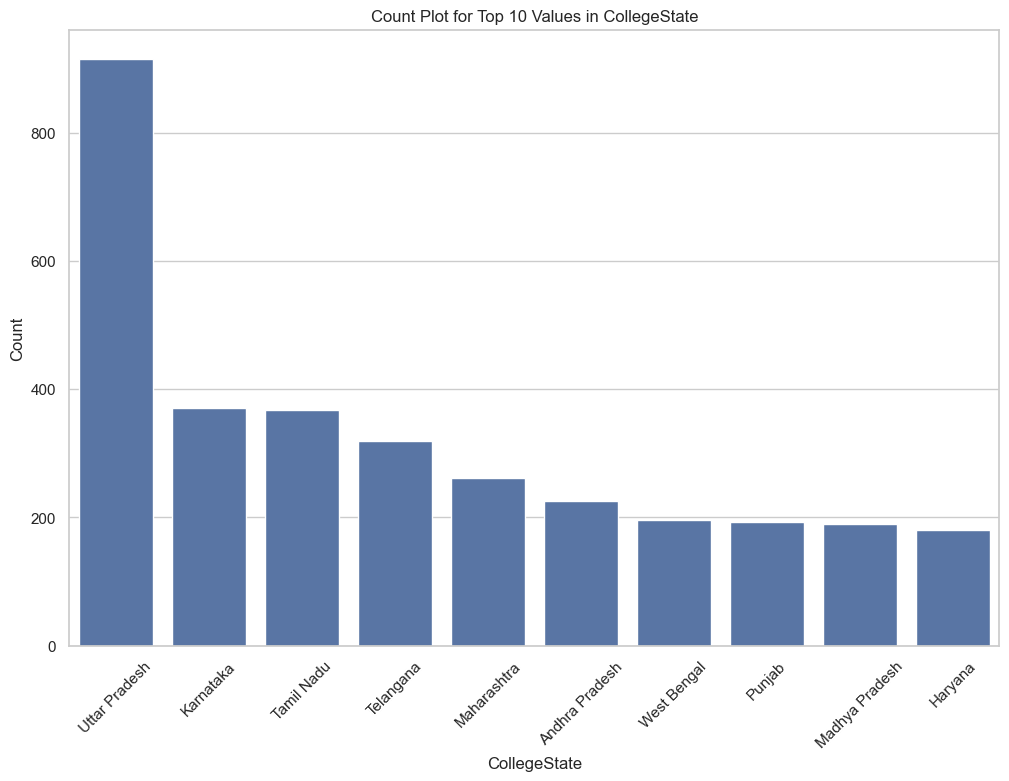

In [85]:
# Create count plots for the top 10 values in each categorical column
for col in df_o:
    # Get the top 10 values and their counts
    top_values = df[col].value_counts().head(10)
    
    # Create a count plot for the top 10 values
    plt.figure(figsize=(12, 8))
    sns.countplot(x=col, data=df, order=top_values.index)
    plt.title(f'Count Plot for Top 10 Values in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [86]:
# Identify numerical columns (float and int)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Find outliers using IQR for each numerical column
outliers_dict = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_dict[col] = df[col][outliers_indices]

# Display the outliers
for col, outliers in outliers_dict.items():
    print(f'Outliers in {col}:\n{outliers}\n')

Outliers in ID:
Series([], Name: ID, dtype: int64)

Outliers in Salary:
3       1100000.0
76       800000.0
92      1500000.0
123     1200000.0
128      675000.0
          ...    
3823     775000.0
3904     850000.0
3912     730000.0
3961     700000.0
3992     800000.0
Name: Salary, Length: 109, dtype: float64

Outliers in 10percentage:
245     50.60
466     44.16
490     44.00
491     45.60
502     48.00
600     49.00
613     48.00
898     49.00
919     48.80
1064    49.00
1102    49.00
1169    48.50
1193    48.00
1235    50.60
1334    43.00
1838    50.00
1845    49.00
1955    45.33
1976    46.24
2037    48.00
2215    50.50
2292    50.00
2432    50.00
2655    50.66
2885    46.80
2982    50.00
3284    50.00
3425    50.00
3690    46.00
3743    49.90
Name: 10percentage, dtype: float64

Outliers in 12graduation:
59      1995
193     2003
528     2003
584     2003
600     2003
670     2003
712     2003
772     2003
828     2003
890     2002
1083    2001
1169    2002
1178    2003
1404    20

## Bi Variate analysis

In [87]:
df.head()

ID     Salary          DOJ          DOL               Designation  \
0  203097   420000.0  6/1/12 0:00      present   senior quality engineer   
1  579905   500000.0  9/1/13 0:00      present         assistant manager   
2  810601   325000.0  6/1/14 0:00      present          systems engineer   
3  267447  1100000.0  7/1/11 0:00      present  senior software engineer   
4  343523   200000.0  3/1/14 0:00  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   
4    Manesar      m  2/27/91 0:00          78.0   

                          10board  ...  ComputerScience  MechanicalEngg  \
0  board ofsecondary education,ap  ...               -1              -1   
1                            cbse  ...               -1              -1   
2                            cbse  ...               -1              -1   
3                            cbse  ...               -1              -1   
4                            cbse  ...               -1              -1   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
0             -1           -1         -1            0.9737        0.8128   
1             -1           -1         -1           -0.7335        0.3789   
2             -1           -1         -1            0.2718        1.7109   
3             -1           -1         -1            0.0464        0.3448   
4             -1           -1         -1           -0.8810       -0.2793   

   extraversion  nueroticism  openess_to_experience  
0        0.5269      1.35490                -0.4455  
1        1.2396     -0.10760                 0.8637  
2        0.1637     -0.86820                 0.6721  
3       -0.3440     -0.40780                -0.9194  
4       -1.0697      0.09163                -0.1295  

[5 rows x 38 columns]

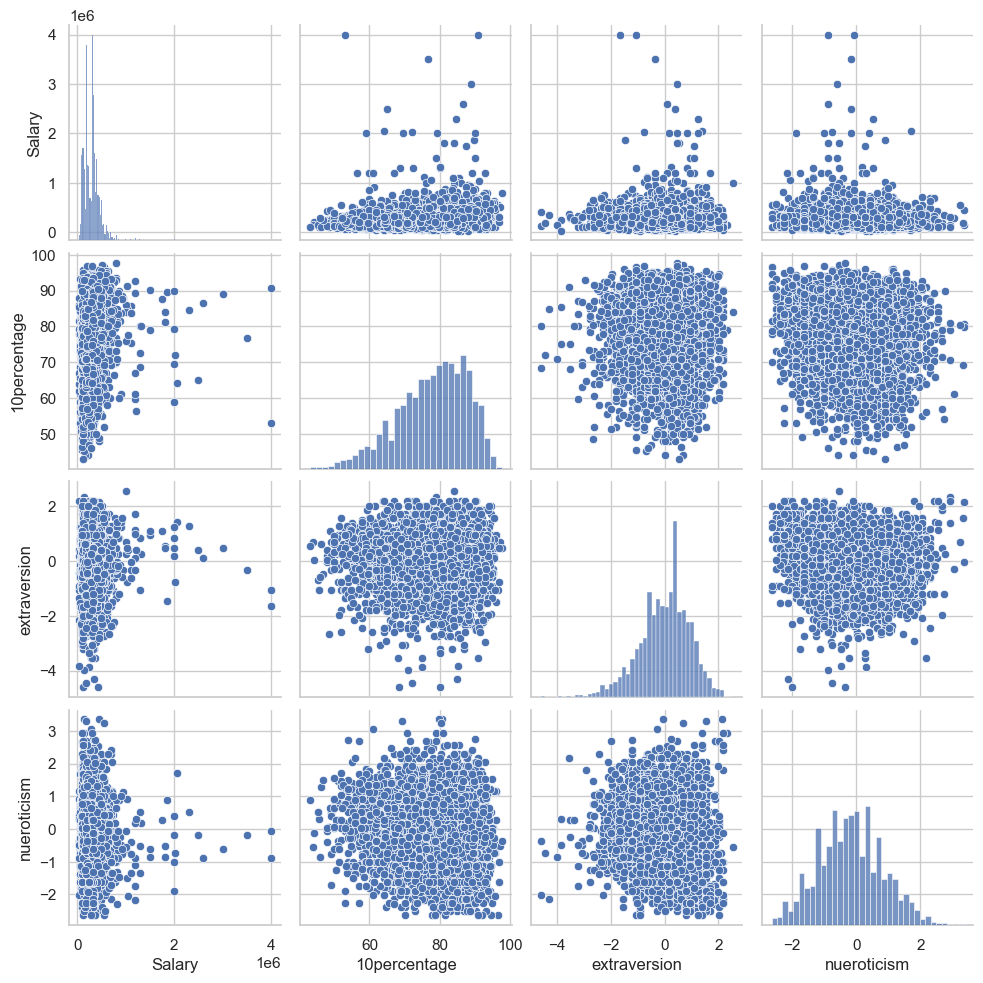

In [90]:
# Pair plot for numerical columns
sns.pairplot(df[['Salary', '10percentage', 'extraversion', 'nueroticism']])
plt.show()

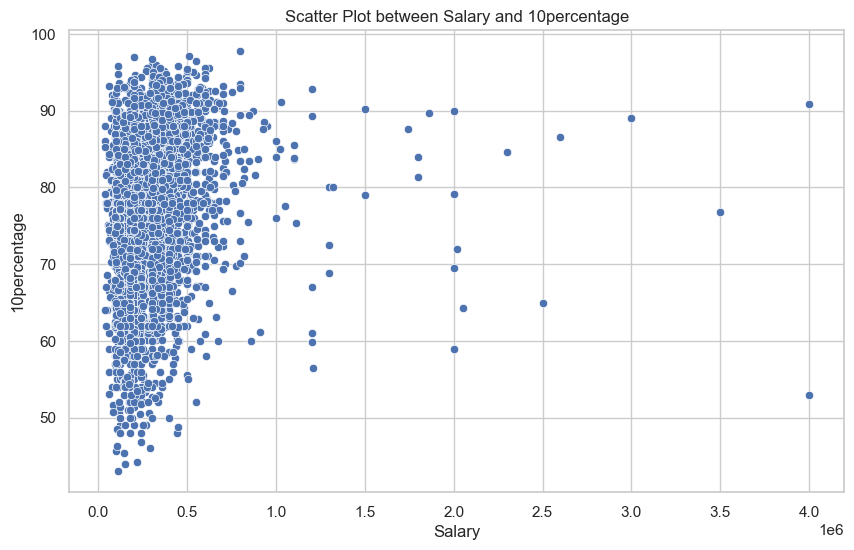

In [89]:
# Scatter plot between 'Salary' and '10percentage'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='10percentage', data=df)
plt.title('Scatter Plot between Salary and 10percentage')
plt.xlabel('Salary')
plt.ylabel('10percentage')
plt.show()

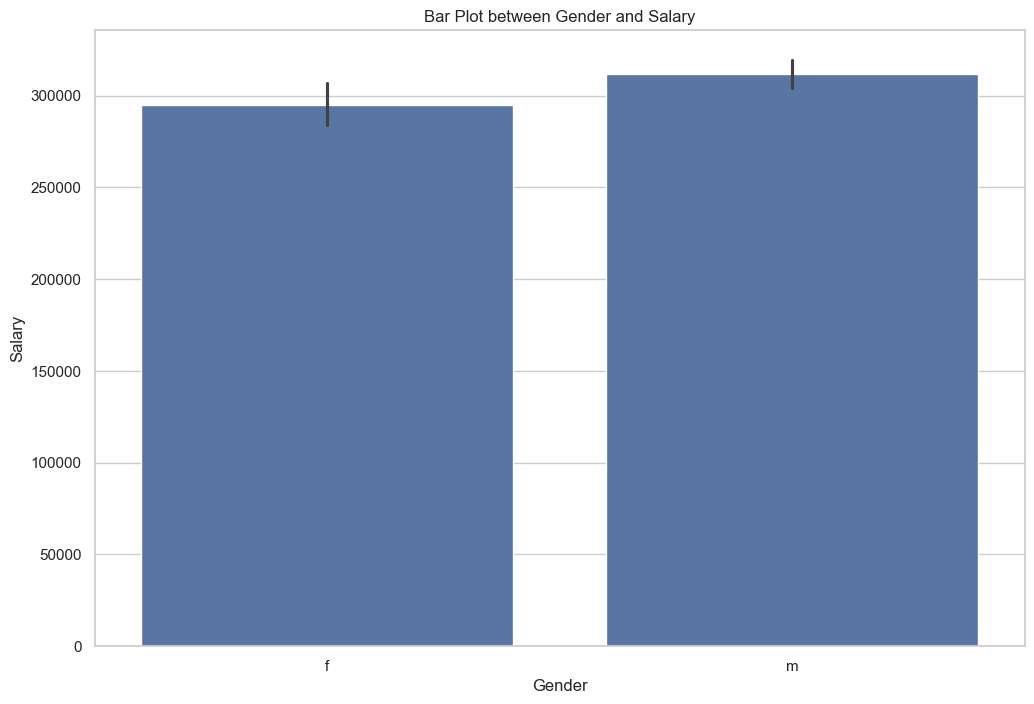

In [91]:
# Bar plot for 'Gender' and 'Salary'
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Salary', data=df)
plt.title('Bar Plot between Gender and Salary')
plt.show()

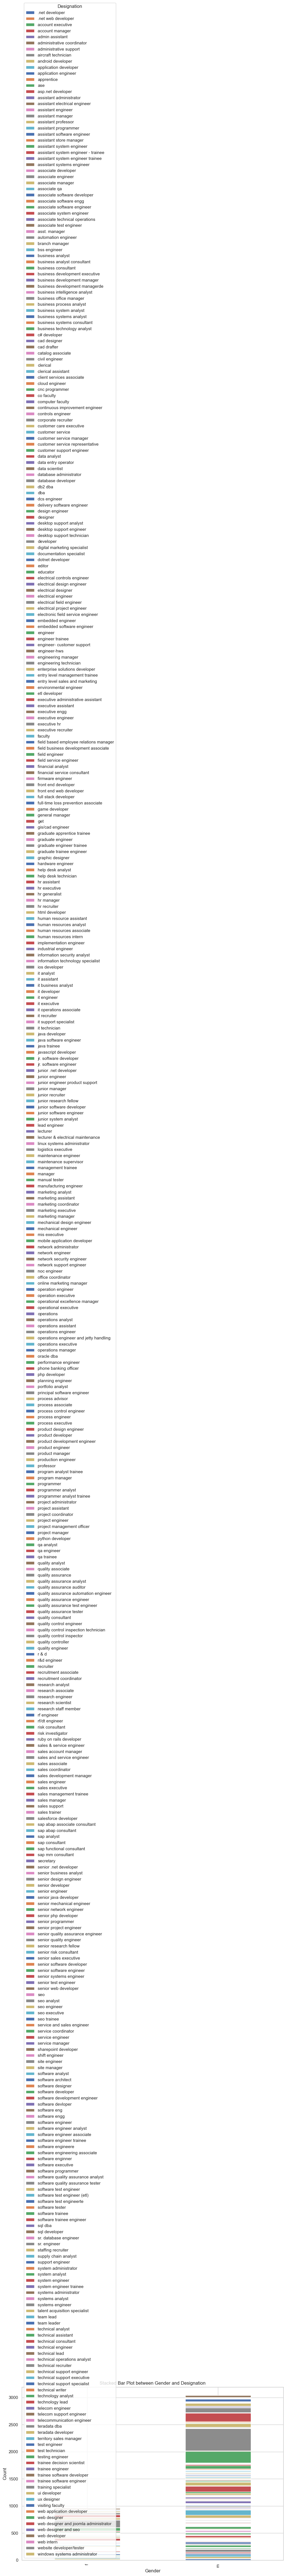

In [92]:
# Stacked bar plot for 'Gender' and 'Designation'
cross_tab = pd.crosstab(df['Gender'], df['Designation'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot between Gender and Designation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [93]:
cross_tab

Designation  .net developer  .net web developer  account executive  \
Gender                                                               
f                         8                   1                  2   
m                        26                   3                  2   

Designation  account manager  admin assistant  administrative coordinator  \
Gender                                                                      
f                          0                0                           0   
m                          1                2                           1   

Designation  administrative support  aircraft technician  android developer  \
Gender                                                                        
f                                 1                    1                 14   
m                                 0                    0                 32   

Designation  application developer  ...  ux designer  visiting faculty  \
Gender                              ...                                  
f                               16  ...            1                 0   
m                               36  ...            1                 1   

Designation  web application developer  web designer  \
Gender                                                 
f                                    1             5   
m                                    5             4   

Designation  web designer and joomla administrator  web designer and seo  \
Gender                                                                     
f                                                0                     1   
m                                                1                     0   

Designation  web developer  web intern  website developer/tester  \
Gender                                                             
f                       17           1                         0   
m                       37           0                         1   

Designation  windows systems administrator  
Gender                                      
f                                        1  
m                                        0  

[2 rows x 419 columns]